In [1]:
#load fft.txt 

samples=[]
sample=[]
for line in open('fft.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample.append(float(line))
    elif line == "FFT OUTPUT end\n":
        samples.append(sample)
        sample=[]

print(samples[0])



[0.0, 814.88, 536.45, 722.18, 1791.48, 941.63, 2284.62, 1321.17, 102.57, 811.09, 2885.62, 6370.16, 2215.86, 2942.39, 1672.5, 1491.49, 913.67, 2270.84, 925.56, 806.17, 992.13, 2501.82, 2536.55, 3454.11, 3638.53, 5182.1, 7681.05, 15792.01, 34521.79, 6406.34, 3722.3, 3564.13, 3963.33, 4002.41, 6135.34, 2734.04, 2734.44, 2232.23, 1598.72, 3163.09, 2104.77, 1630.1, 1803.21, 1342.78, 3465.58, 11492.6, 663.7, 849.37, 1128.66, 515.15, 1413.17, 1465.32, 2258.79, 1804.47, 1871.4, 2724.63, 2297.17, 1321.81, 851.48, 1054.98, 948.23, 36.22, 5038.25, 987.91]


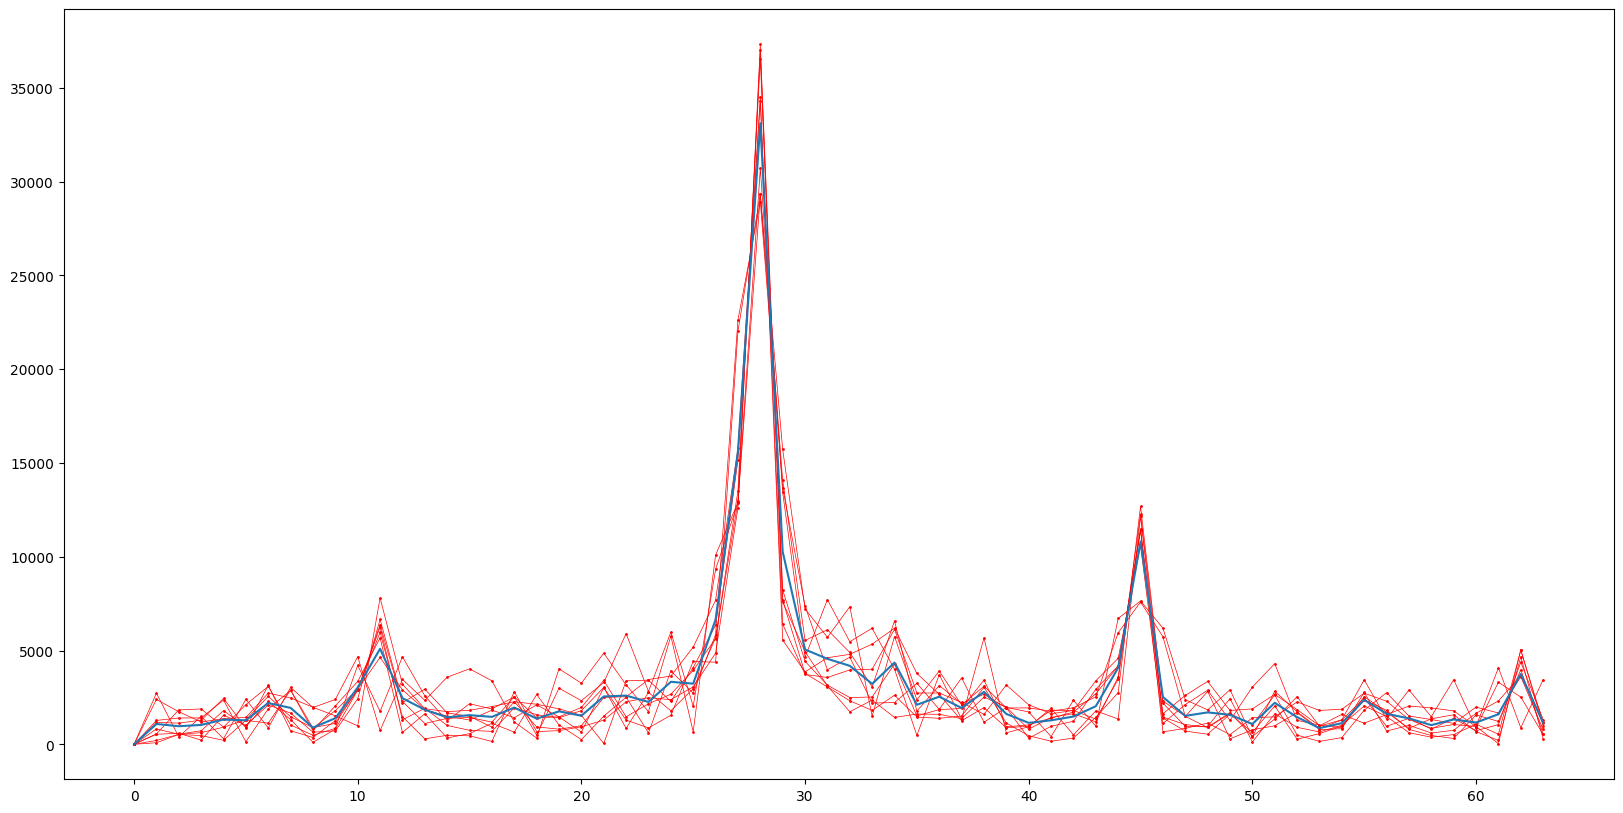

9


In [2]:
#plot every sample in one plot

import matplotlib.pyplot as plt
import numpy as np

#calculate the mean of all samples
mean = np.mean(samples, axis=0)


#big plot 
plt.figure(figsize=(20,10))





for sample in samples:
    #dot plot
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

plt.plot(mean)
plt.show()

print(len(samples))





/var/folders/wk/1gf2_m552kl8lnst82lpjrn00000gn/T/ipykernel_6832/3829584554.py:8: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


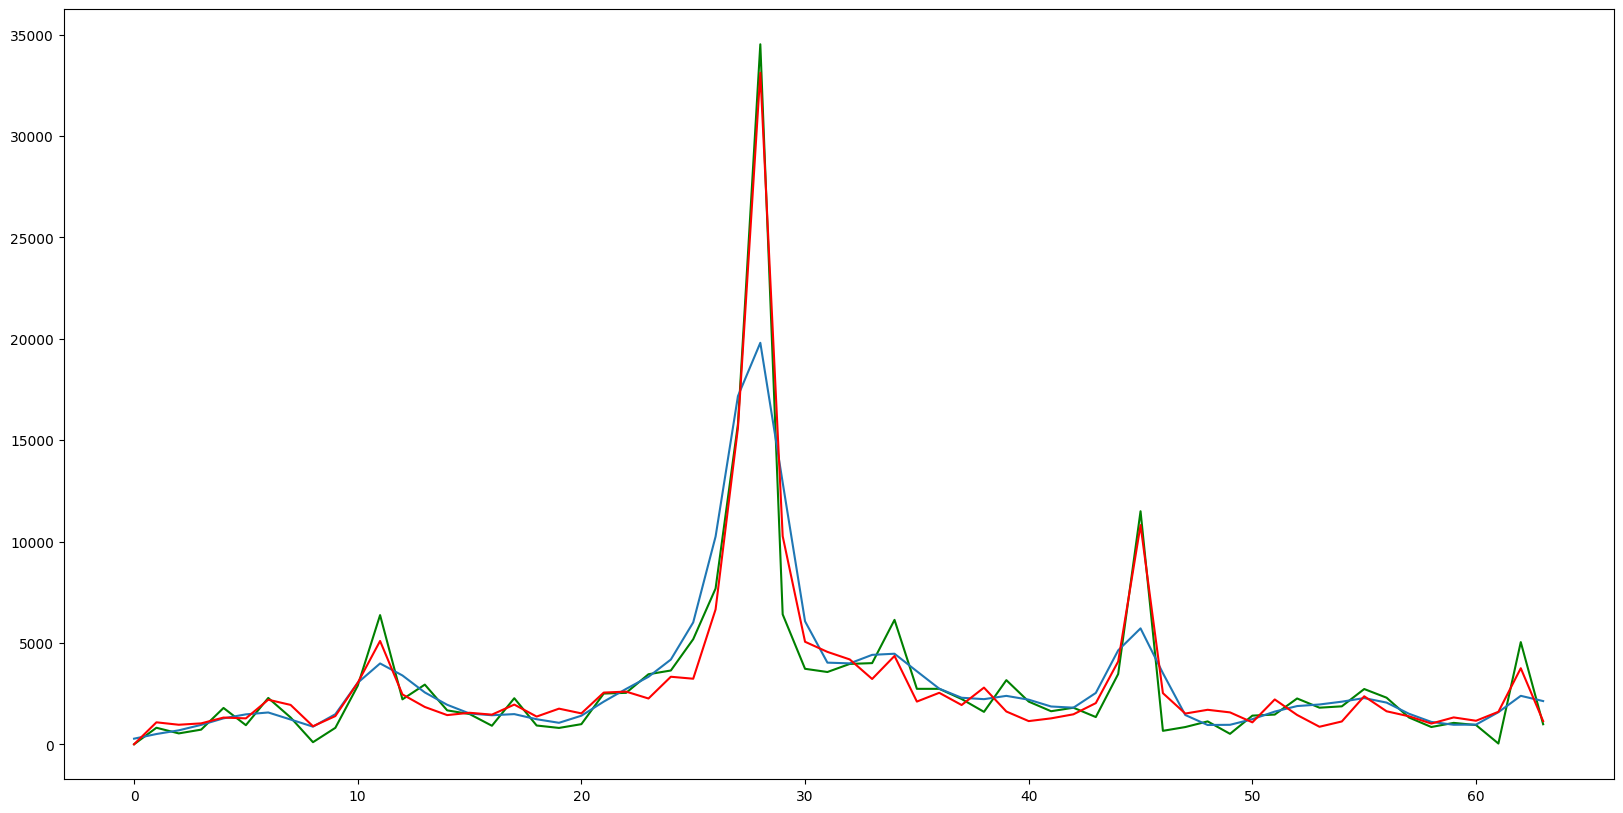

In [3]:
#take the first maple apply gausian filter

sample1 = samples[0]
sample1 = np.array(sample1.copy())
sample1 = sample1.astype('float32')


from scipy.ndimage.filters import gaussian_filter1d
sample1 = gaussian_filter1d(sample1, sigma=1)

#reshape the sample
sample1 = sample1.reshape(-1)



plt.figure(figsize=(20,10))
plt.plot(samples[0], color='green')
plt.plot(sample1)
plt.plot(mean, color='red')
plt.show()

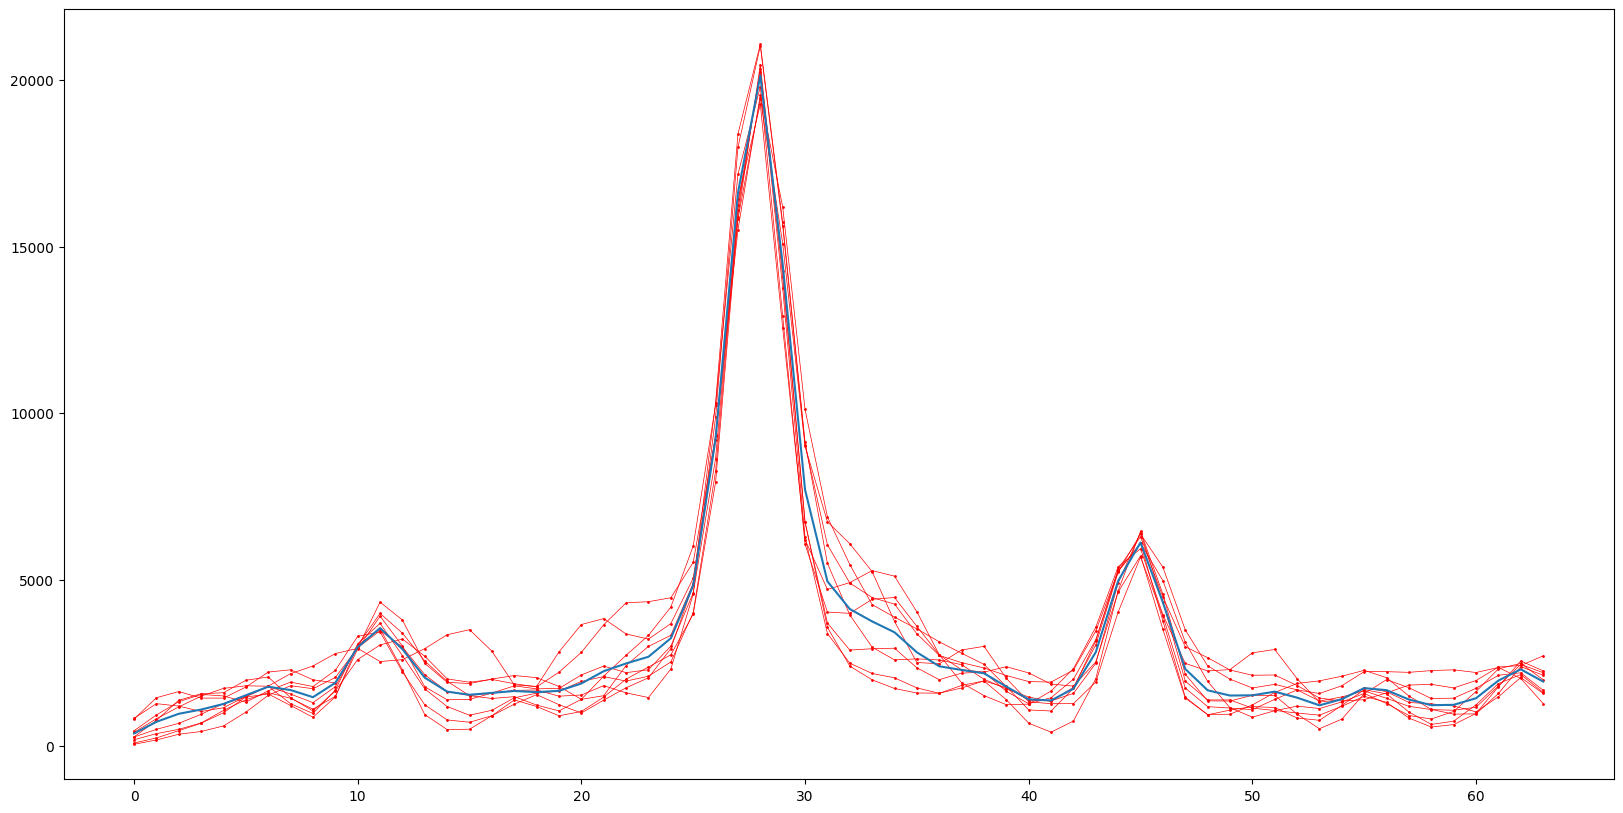

In [4]:
gausain_filtered_samples = []
for sample in samples:
    sample = np.array(sample.copy())
    sample = sample.astype('float32')
    sample = gaussian_filter1d(sample, sigma=1)
    sample = sample.reshape(-1)
    gausain_filtered_samples.append(sample)

#calculate the mean of all samples
gausain_filtered_samples_mean = np.mean(gausain_filtered_samples, axis=0)

plt.figure(figsize=(20,10))
for sample in gausain_filtered_samples:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(gausain_filtered_samples_mean)
plt.show()

#calculate the average fit of the samples to the mean of all samples




In [5]:
# open fft_while_moving.txt

samples_moving=[]
sample_moving=[]
for line in open('fft_while_moving.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample_moving.append(float(line))
    elif line == "FFT OUTPUT end\n":
        samples_moving.append(sample_moving)
        sample_moving=[]

print(samples_moving[0])

[0.0, 1082.86, 1606.43, 1112.89, 1644.07, 2924.6, 674.72, 1853.41, 328.12, 1266.36, 3848.94, 3223.4, 4453.02, 417.63, 1669.45, 1870.0, 2783.38, 2687.35, 2010.85, 3052.26, 3100.98, 4857.29, 3589.38, 2158.22, 5406.42, 885.91, 8057.48, 11940.01, 33460.01, 12720.42, 5580.07, 4912.8, 4957.67, 4181.52, 3683.48, 590.36, 4444.95, 547.16, 2558.26, 1508.61, 3334.68, 1863.63, 2386.16, 3480.98, 1096.04, 11613.82, 514.67, 283.15, 1137.54, 1431.17, 2056.31, 710.91, 1841.43, 1301.49, 635.88, 3195.1, 2102.45, 1235.87, 398.85, 2211.51, 546.64, 1279.69, 3981.0, 1049.25]


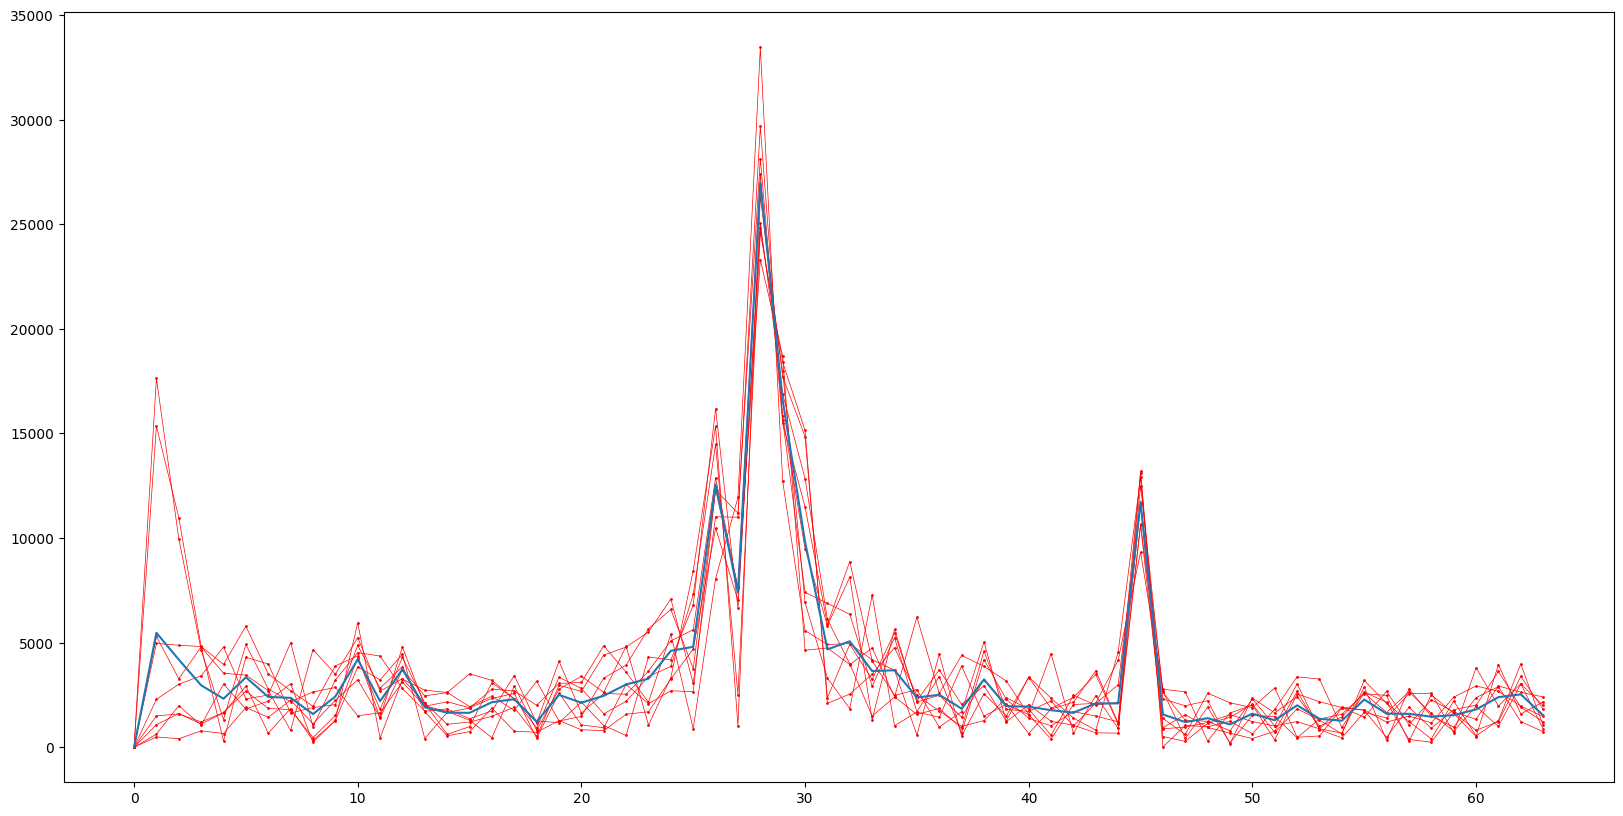

9


In [6]:
#plot every sample in one plot

mean = np.mean(samples_moving, axis=0)

plt.figure(figsize=(20,10))
for sample in samples_moving:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(mean)
plt.show()
print(len(samples_moving))


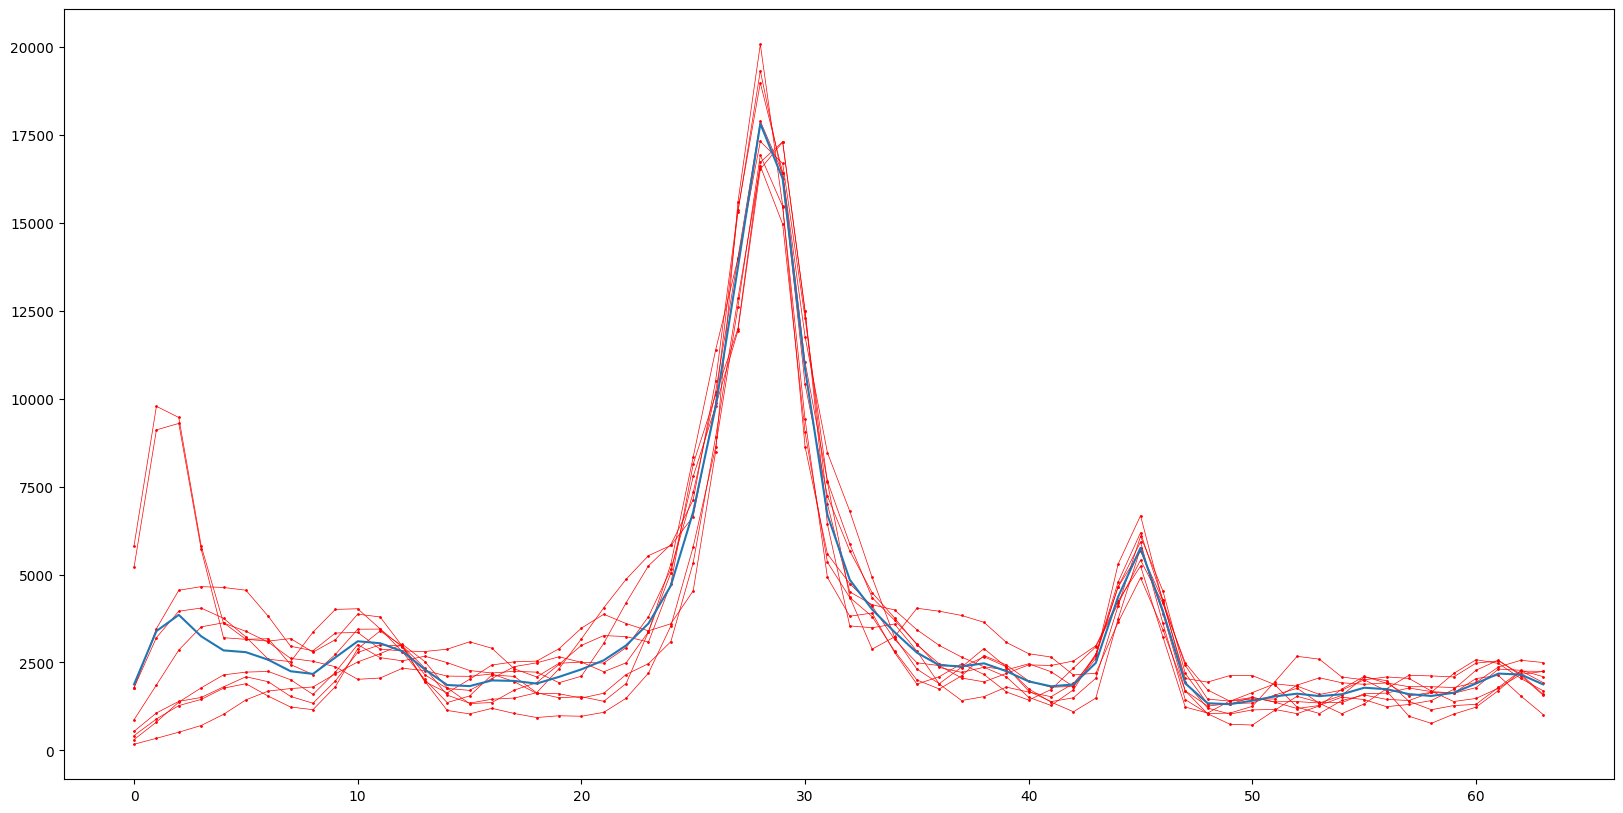

In [7]:
#gausian filter

gausain_filtered_samples_moving = []
for sample in samples_moving:
    sample = np.array(sample.copy())
    sample = sample.astype('float32')
    sample = gaussian_filter1d(sample, sigma=1)
    sample = sample.reshape(-1)
    gausain_filtered_samples_moving.append(sample)

#calculate the mean of all samples
gausain_filtered_samples_moving_mean = np.mean(gausain_filtered_samples_moving, axis=0)

plt.figure(figsize=(20,10))
for sample in gausain_filtered_samples_moving:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(gausain_filtered_samples_moving_mean)
plt.show()

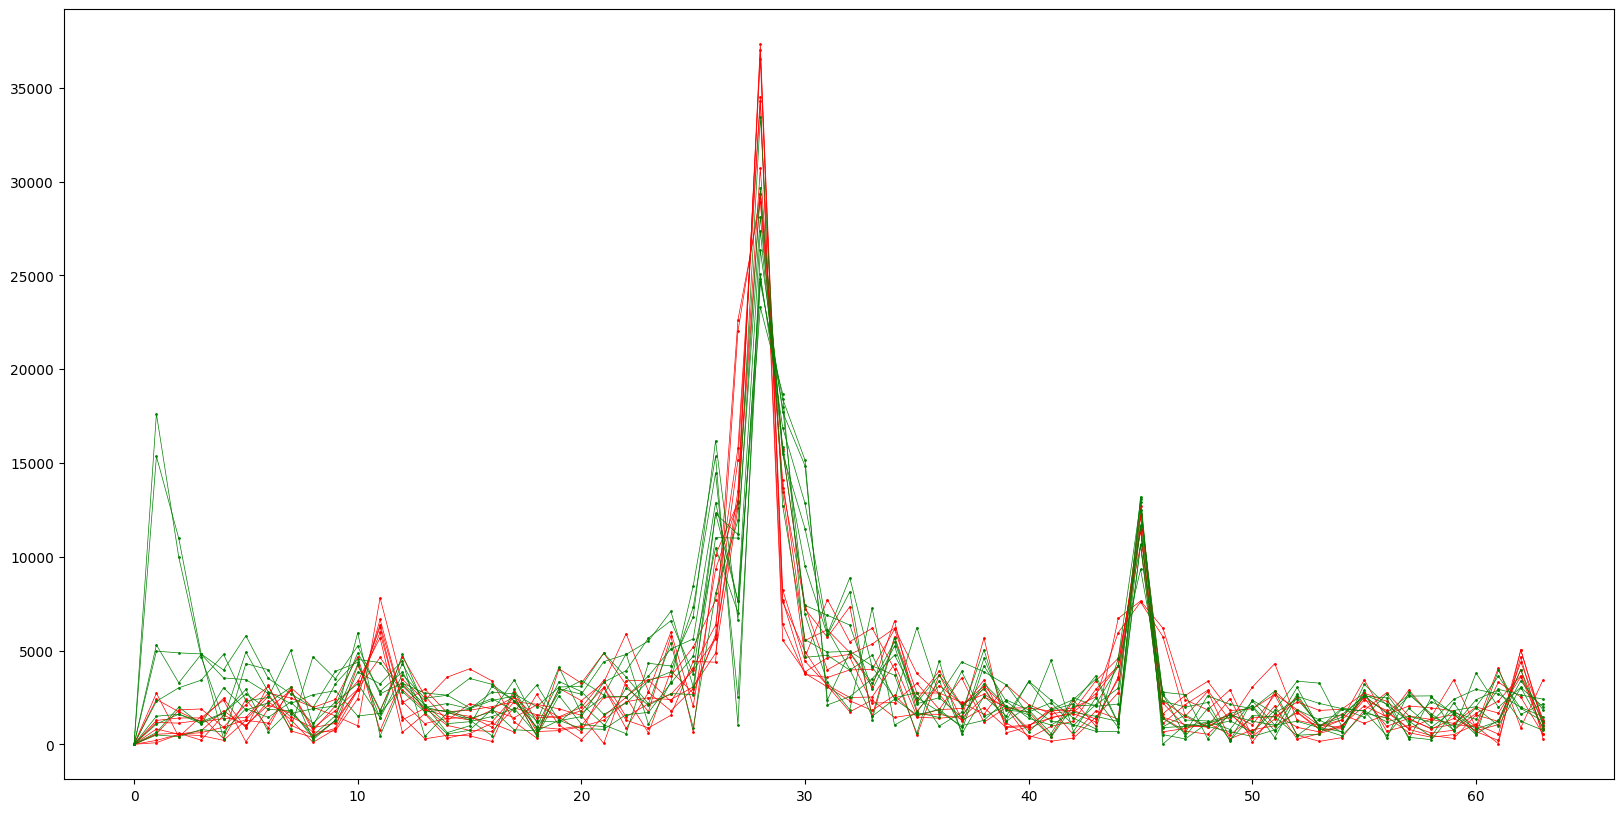

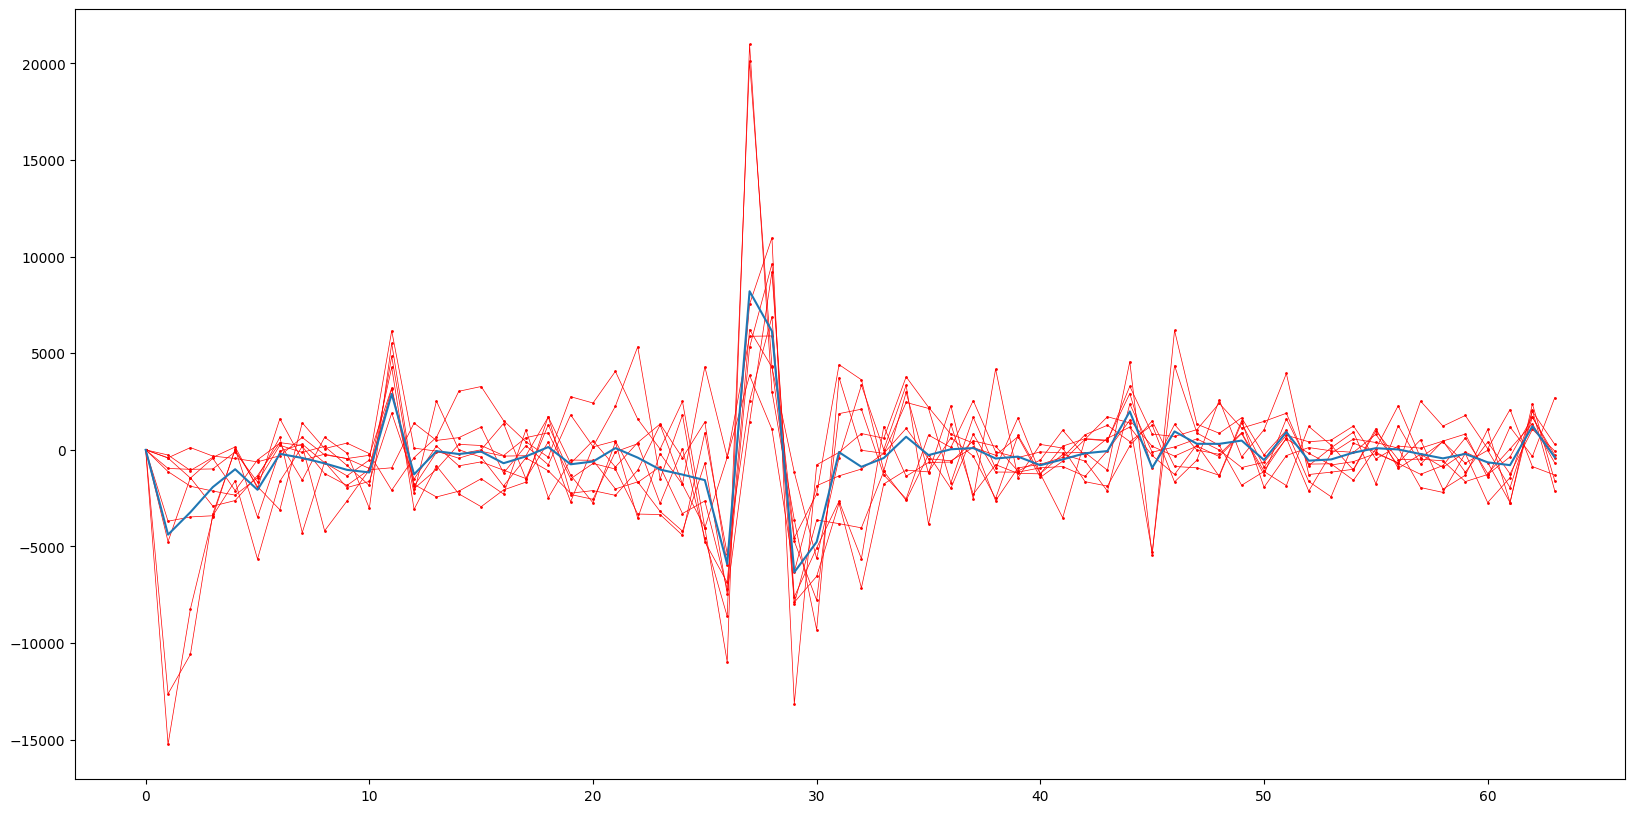

In [8]:
#plot all samples in one plot

#plot normal samples
plt.figure(figsize=(20,10))
for sample in samples:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

#plot moving samples
for sample in samples_moving:
    plt.plot(sample, color='green', linewidth=0.5, marker='o', markersize=1)

#calculate the mean of all samples
plt.show()

#calculate difference between samples normal and moving

#turn to numpy array
samples = np.array(samples)
samples_moving = np.array(samples_moving)
#difference between samples normal and moving
difference = samples - samples_moving

#average difference
mean_difference = np.mean(difference, axis=0)


#plot difference
plt.figure(figsize=(20,10))
for sample in difference:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(mean_difference)
plt.show()


#plot the difference beeten gaussian filtered samples



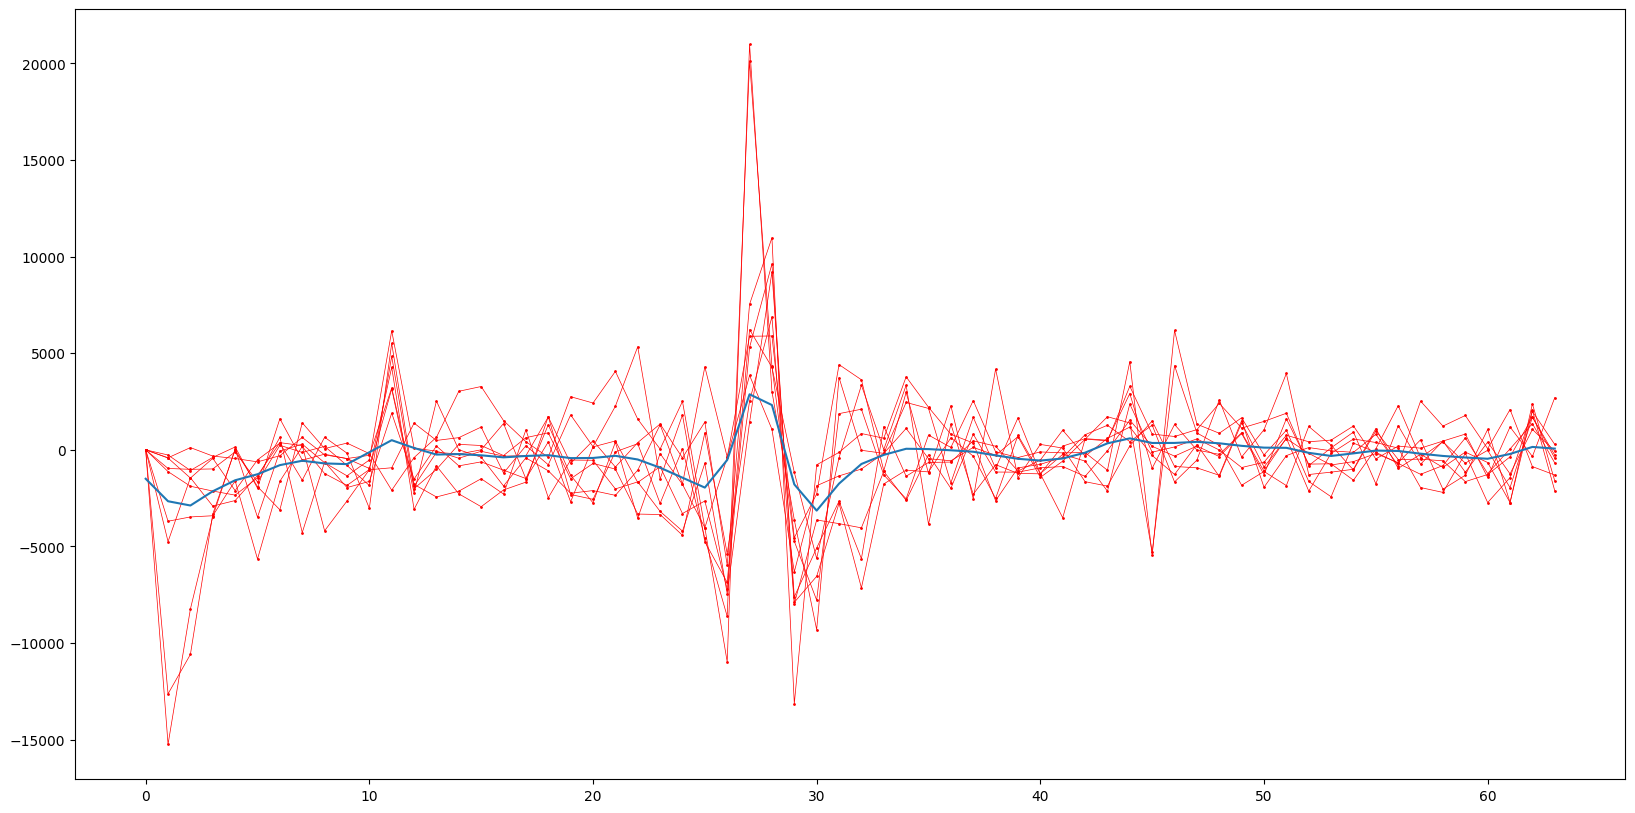

In [9]:
diff_avg = gausain_filtered_samples_mean - gausain_filtered_samples_moving_mean

plt.figure(figsize=(20,10))
for sample in difference:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(diff_avg)
plt.show()


In [10]:
#load fft_noise.txt

samples_noise=[]
sample_noise=[]

for line in open('fft_noise.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample_noise.append(float(line))
    elif line == "FFT OUTPUT end\n":
        samples_noise.append(sample_noise)
        sample_noise=[]
print(samples_noise[0])

#turn to numpy array
samples_noise = np.array(samples_noise)


[0.0, 5735.09, 7569.2, 3584.76, 2268.1, 7084.62, 4426.87, 6533.05, 3195.49, 997.93, 2088.84, 2626.27, 2364.51, 4047.59, 2430.48, 4925.69, 3509.26, 7787.76, 7843.54, 2557.23, 5381.59, 4448.51, 8593.84, 11405.64, 3070.94, 5784.09, 2392.39, 4789.7, 3007.03, 8497.44, 1582.08, 1169.53, 3292.01, 7039.5, 2538.6, 8628.37, 6600.31, 5341.69, 10312.44, 827.8, 7180.29, 9157.17, 8265.14, 7307.7, 2105.51, 4282.52, 2107.5, 9131.88, 4792.73, 5642.43, 2639.86, 6976.32, 5985.27, 1646.29, 2756.86, 6473.77, 3033.14, 6470.13, 4880.47, 3694.4, 4345.96, 1399.91, 4291.67, 1492.27]


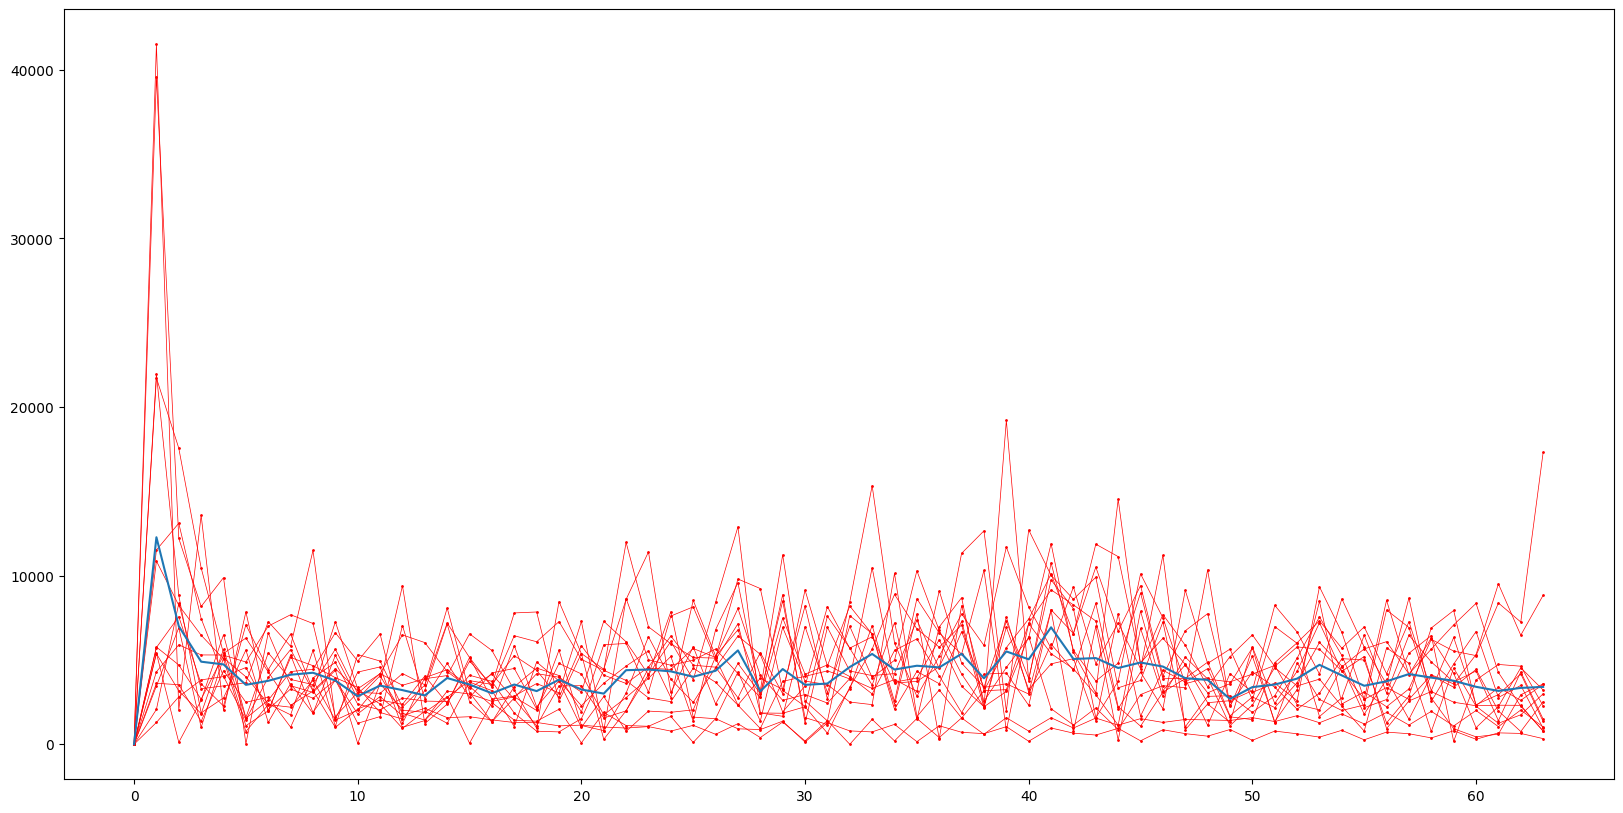

In [11]:
#plot every sample in one plot

noise_men = np.mean(samples_noise, axis=0)

plt.figure(figsize=(20,10))
for sample in samples_noise:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(noise_men)
plt.show()

In [12]:
# open fft_falsepositive.txt

samples_falsepositive=[]
sample_falsepositive=[]
for line in open('fft_falsepositive.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample_falsepositive.append(float(line))
    elif line == "FFT OUTPUT end\n":
        samples_falsepositive.append(sample_falsepositive)
        sample_falsepositive=[]

print(samples_falsepositive[0])

#to numpy array
samples_falsepositive = np.array(samples_falsepositive)



[0.0, 8425.39, 5621.23, 2326.35, 2875.41, 2080.8, 2608.09, 2327.35, 4640.61, 4546.8, 2876.35, 3760.46, 4101.76, 4739.76, 1971.17, 2940.85, 6649.46, 3164.81, 3625.02, 2179.53, 4227.28, 3918.79, 2584.42, 2352.32, 1666.19, 4411.05, 5257.4, 13655.54, 6803.05, 6053.36, 6358.77, 9140.34, 2180.79, 2698.72, 7011.49, 3021.03, 2770.56, 13584.0, 6950.72, 5157.28, 5985.95, 4465.55, 1564.77, 10732.58, 3817.34, 7928.97, 1127.78, 6370.63, 7102.21, 2697.22, 5511.37, 2484.04, 4160.5, 4011.55, 6797.34, 1949.85, 9516.37, 2720.5, 4067.6, 1223.64, 1460.07, 2548.9, 4958.23, 4475.53]


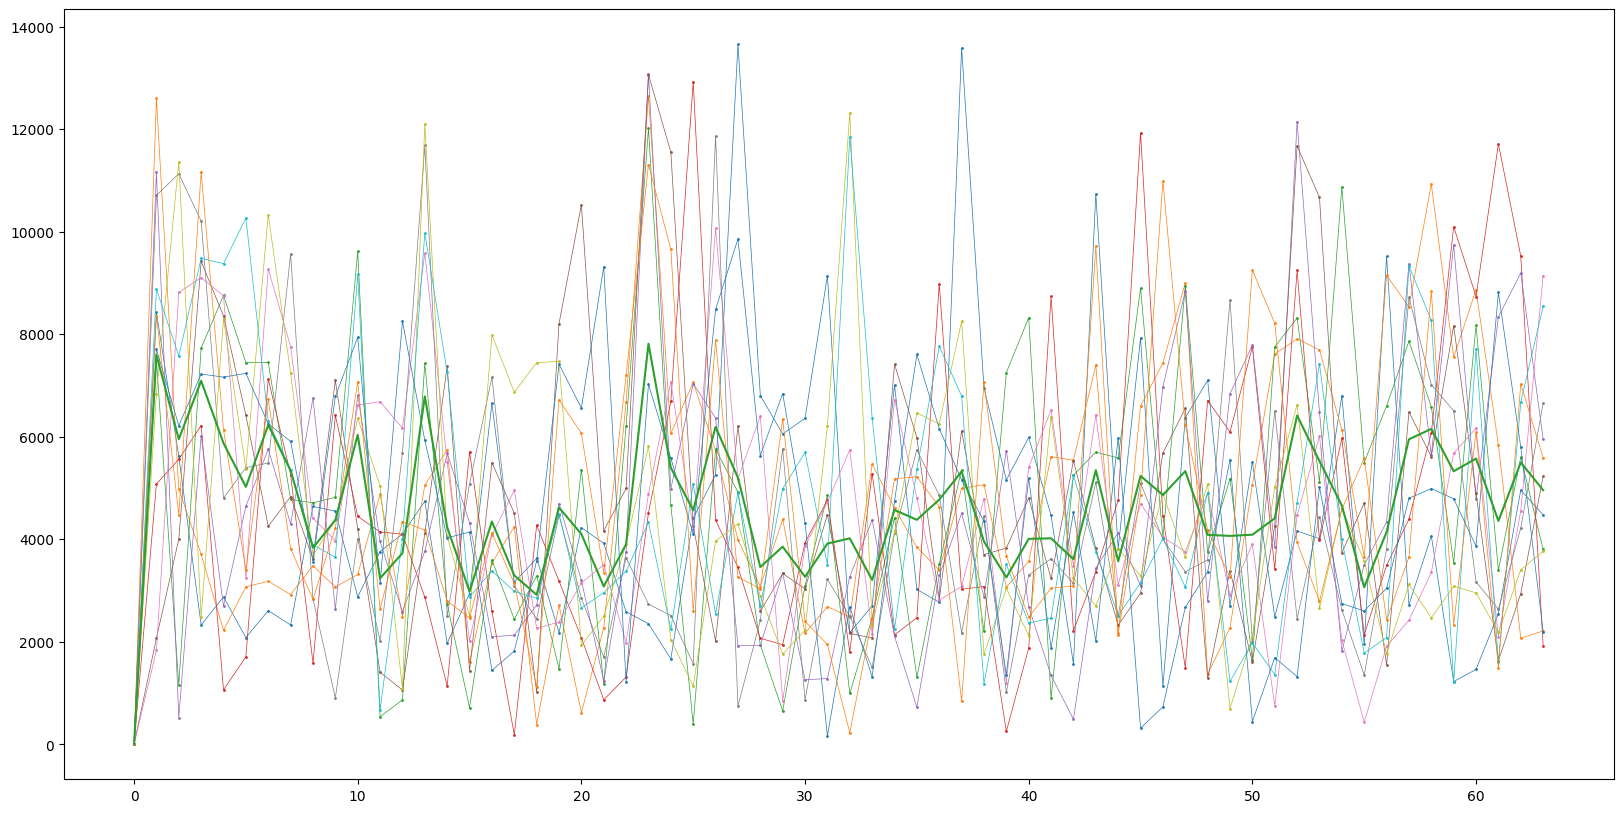

27
23
23
25
23
23
26
26
32
32
27
23


In [13]:
# plot every sample in one plot

mean = np.mean(samples_falsepositive, axis=0)

plt.figure(figsize=(20,10))

for sample in samples_falsepositive:
    plt.plot(sample,linewidth=0.5, marker='o', markersize=1)
plt.plot(mean)
plt.show()

#print indec of max value of every sample
for sample in samples_falsepositive:
    print(np.argmax(sample))

    


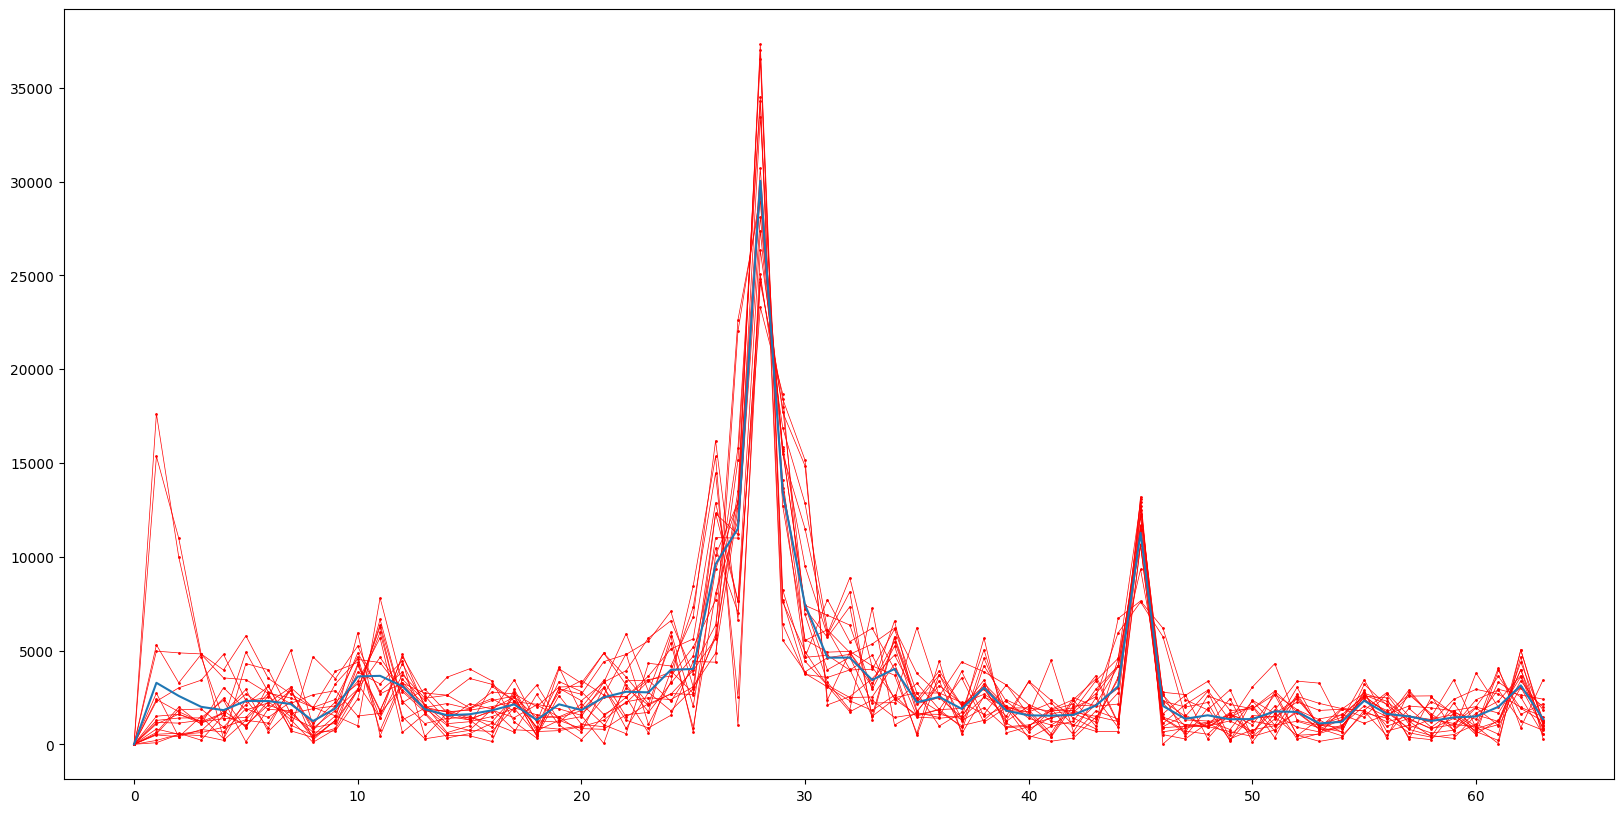

In [14]:
#cluster all types of samples

samplesOK = np.concatenate((samples, samples_moving), axis=0)


#calculate the mean of all samples
samplesOK_mean = np.mean(samplesOK, axis=0)

plt.figure(figsize=(20,10))
for sample in samplesOK:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(samplesOK_mean)

plt.show()




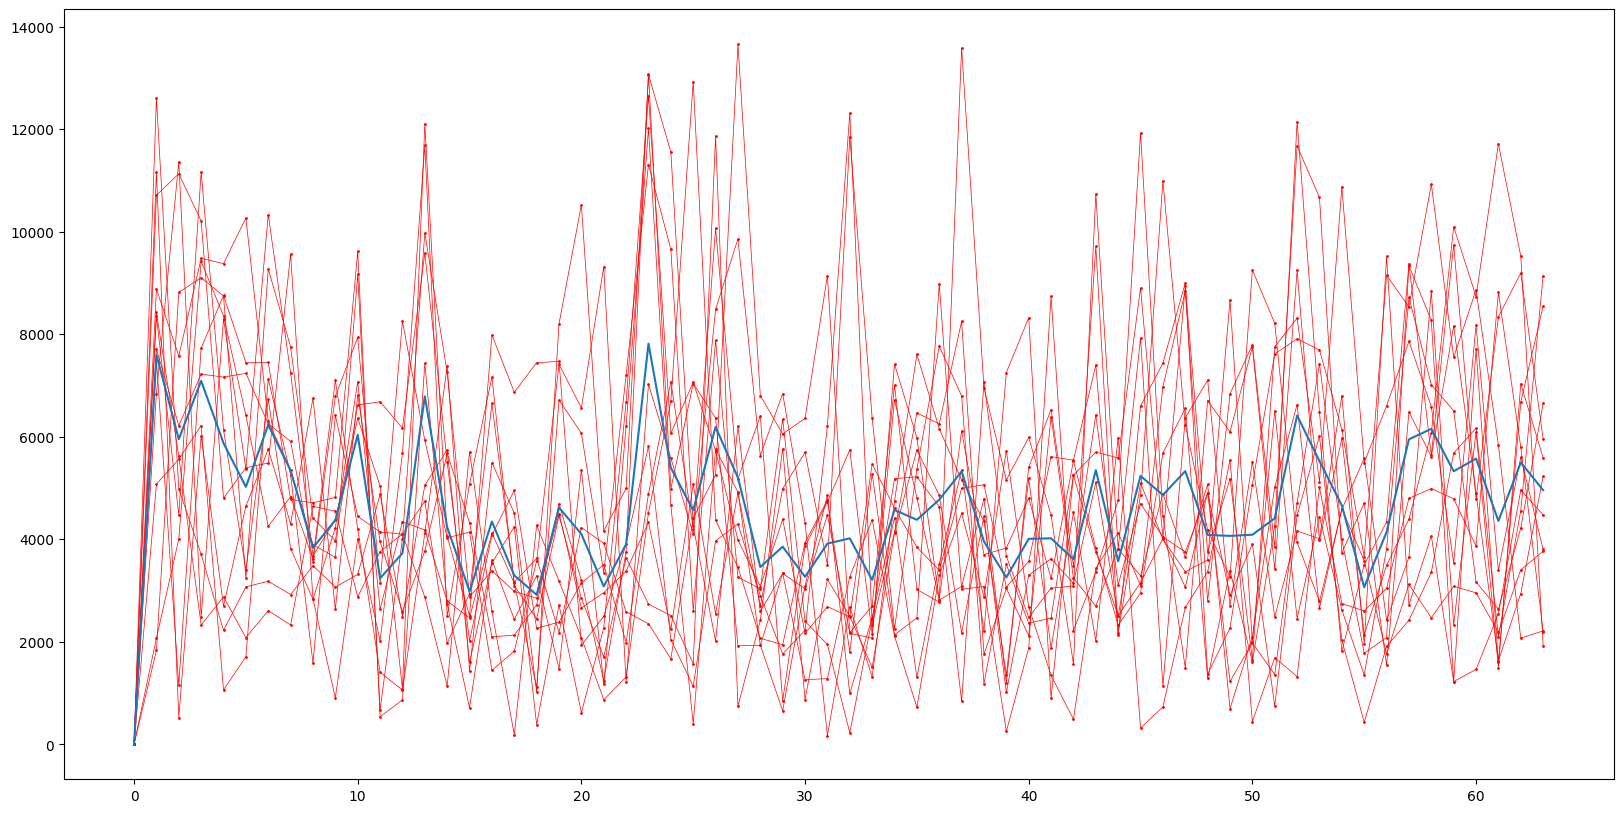

In [15]:
samples_bad = samples_falsepositive

#calculate the mean of all samples
samples_bad_mean = np.mean(samples_bad, axis=0)

plt.figure(figsize=(20,10))
for sample in samples_bad:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)
plt.plot(samples_bad_mean)
plt.show()

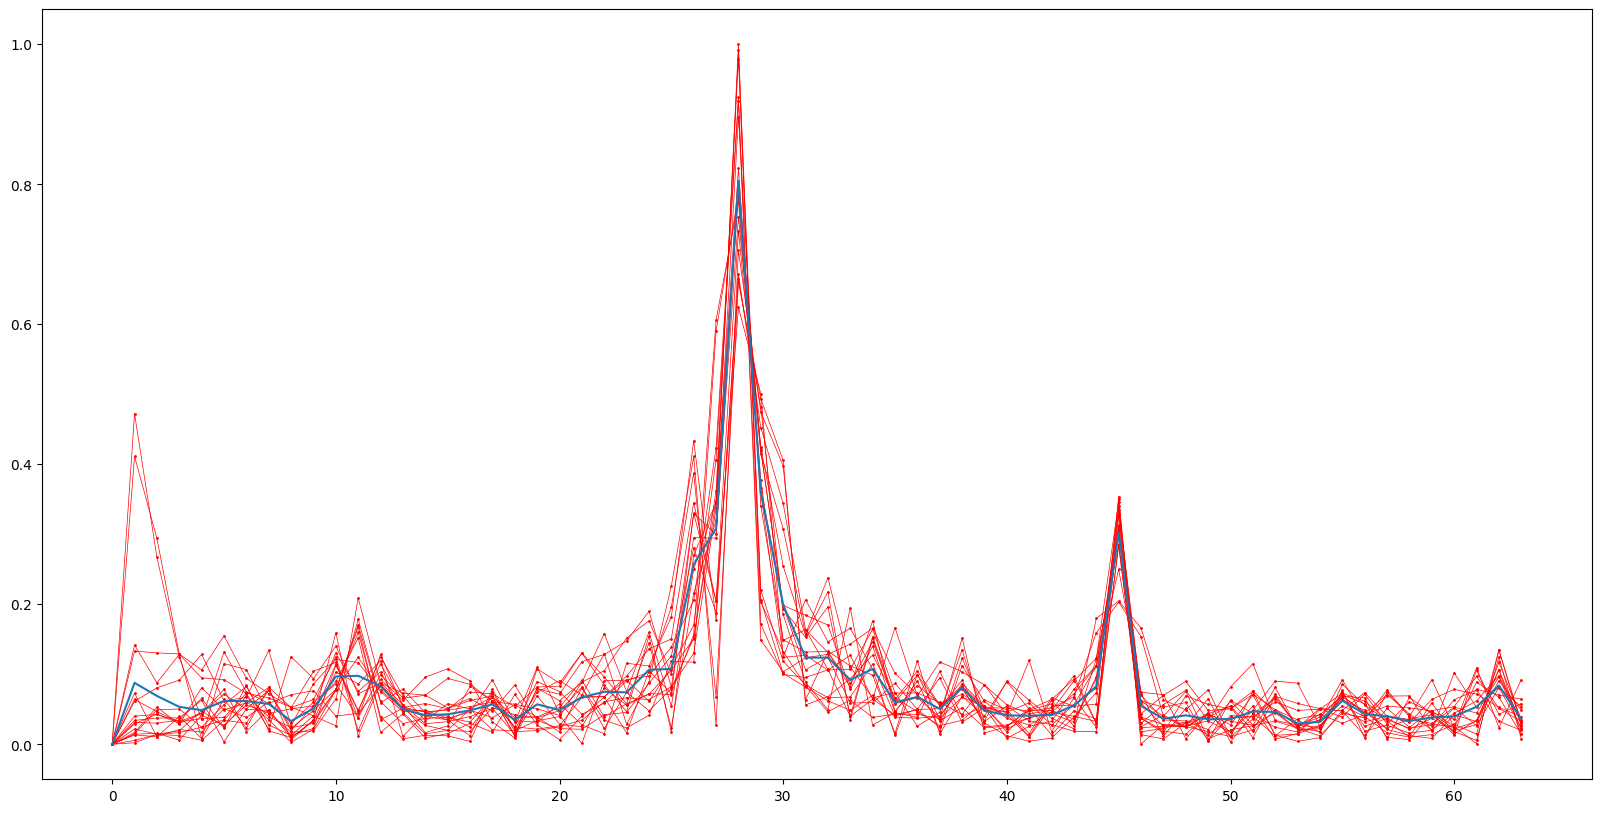

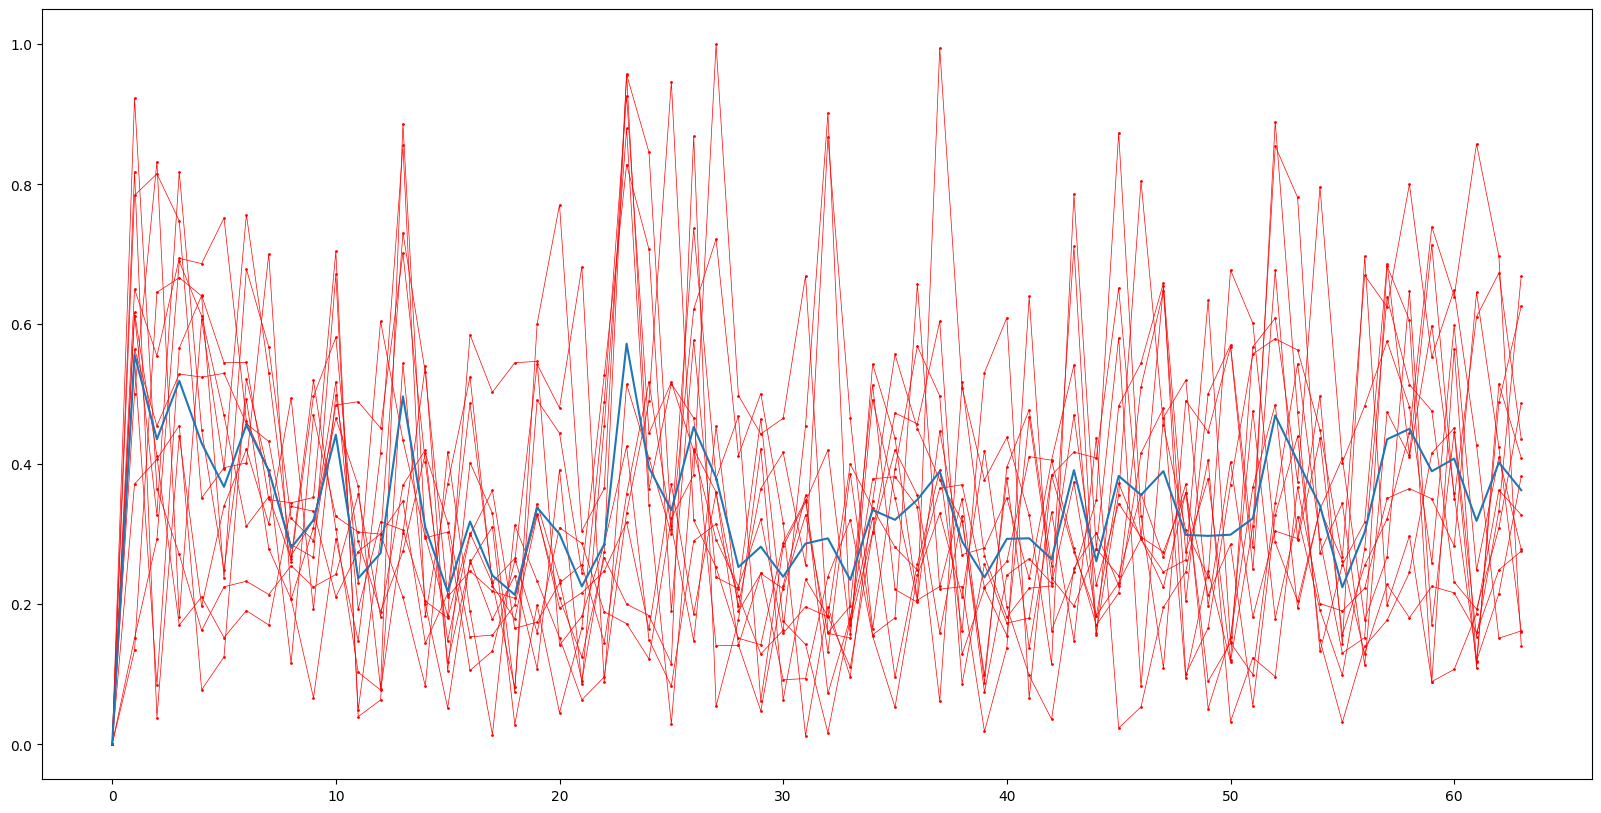

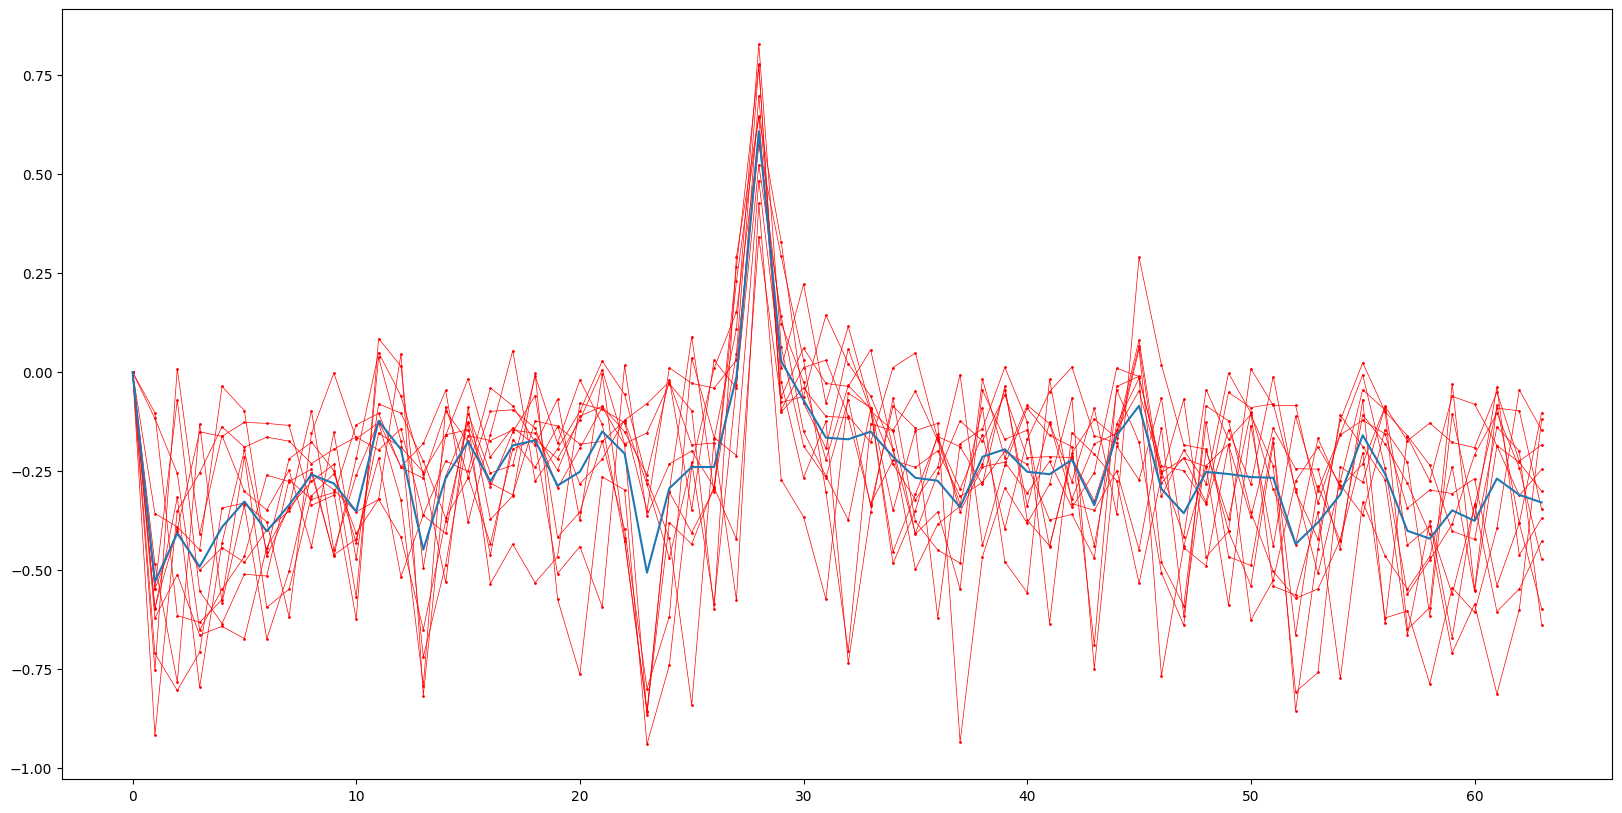

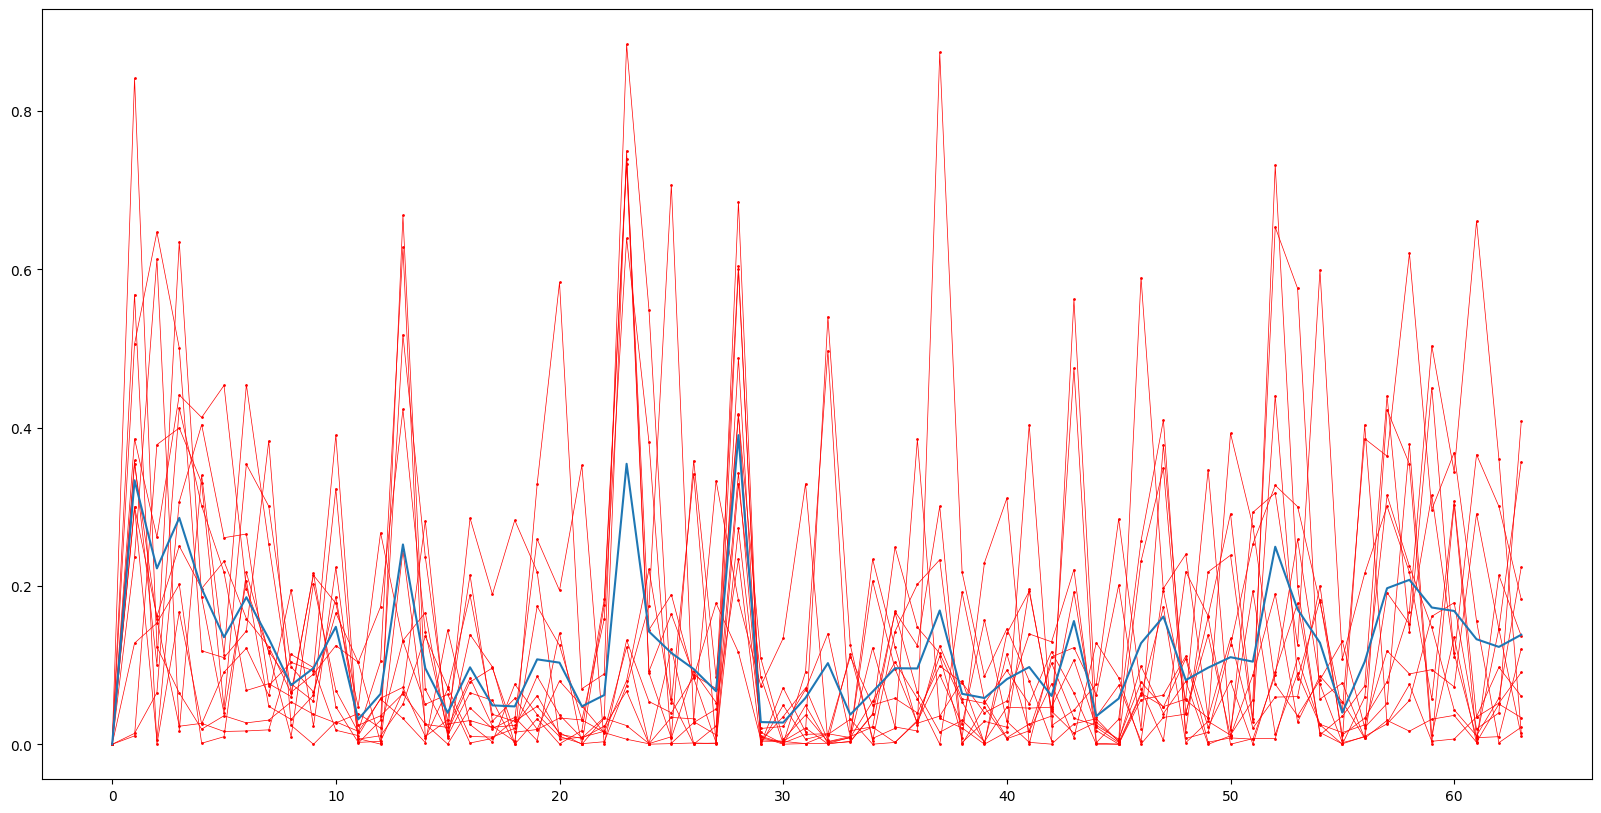

In [16]:
#scale the good samples from 0 to 1

samplesOK = samplesOK - np.min(samplesOK)
samplesOK = samplesOK / np.max(samplesOK)

#scale the bad samples from 0 to 1

samples_bad = samples_bad - np.min(samples_bad)
samples_bad = samples_bad / np.max(samples_bad)

#plot the scaled samples

#means of the scaled samples
samplesOK_mean = np.mean(samplesOK, axis=0)
samples_bad_mean = np.mean(samples_bad, axis=0)


plt.figure(figsize=(20,10))
for sample in samplesOK:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

#mean
plt.plot(samplesOK_mean)
plt.show()

plt.figure(figsize=(20,10))
for sample in samples_bad:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

#mean
plt.plot(samples_bad_mean)
plt.show()

#plot the difference between the scaled samples

#reshape the samples if they are not the same size cut the longer one
if samplesOK.shape[0] > samples_bad.shape[0]:
    samplesOK = samplesOK[0:samples_bad.shape[0],:]
else:
    samples_bad = samples_bad[0:samplesOK.shape[0],:]



difference = samplesOK - samples_bad
#avg
mean_difference = np.mean(difference, axis=0)
plt.figure(figsize=(20,10))
for sample in difference:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

plt.plot(mean_difference)
plt.show()

#calculate squared difference between samples
squared_difference = np.square(difference)

#calculate the mean of the squared difference
mean_squared_difference = np.mean(squared_difference, axis=0)

plt.figure(figsize=(20,10))
for sample in squared_difference:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

plt.plot(mean_squared_difference)
plt.show()


#calculate the sum of the squared difference
sum_squared_difference = np.sum(squared_difference, axis=0)








In [17]:
#load test sammple fft_test_sample.txt


sample_test=[]
for line in open('fft_test_sample.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample_test.append(float(line))
    elif line == "FFT OUTPUT end\n":
        pass

print(sample_test)

#scale the test sample
sample_test = sample_test - np.min(sample_test)
sample_test = sample_test / np.max(sample_test)


[0.0, 1391.06, 1303.43, 1948.24, 842.57, 1336.63, 2023.17, 3124.68, 1618.5, 1796.28, 6131.4, 1833.93, 3836.14, 2357.35, 3760.77, 2558.72, 3259.94, 2008.43, 138.97, 1328.06, 1734.11, 5226.07, 2345.97, 4398.27, 7016.04, 2918.36, 12085.15, 10858.23, 29105.04, 14691.74, 9079.71, 6350.74, 7269.92, 4014.59, 5240.39, 2633.5, 4035.07, 2268.27, 2286.66, 1251.21, 2409.48, 986.55, 3198.84, 1681.85, 2899.88, 11907.6, 1910.21, 855.28, 1710.54, 907.67, 2435.57, 692.95, 3154.61, 566.94, 2737.52, 1053.59, 589.75, 2993.93, 142.76, 2341.49, 1695.2, 3158.72, 3464.59, 2580.94]


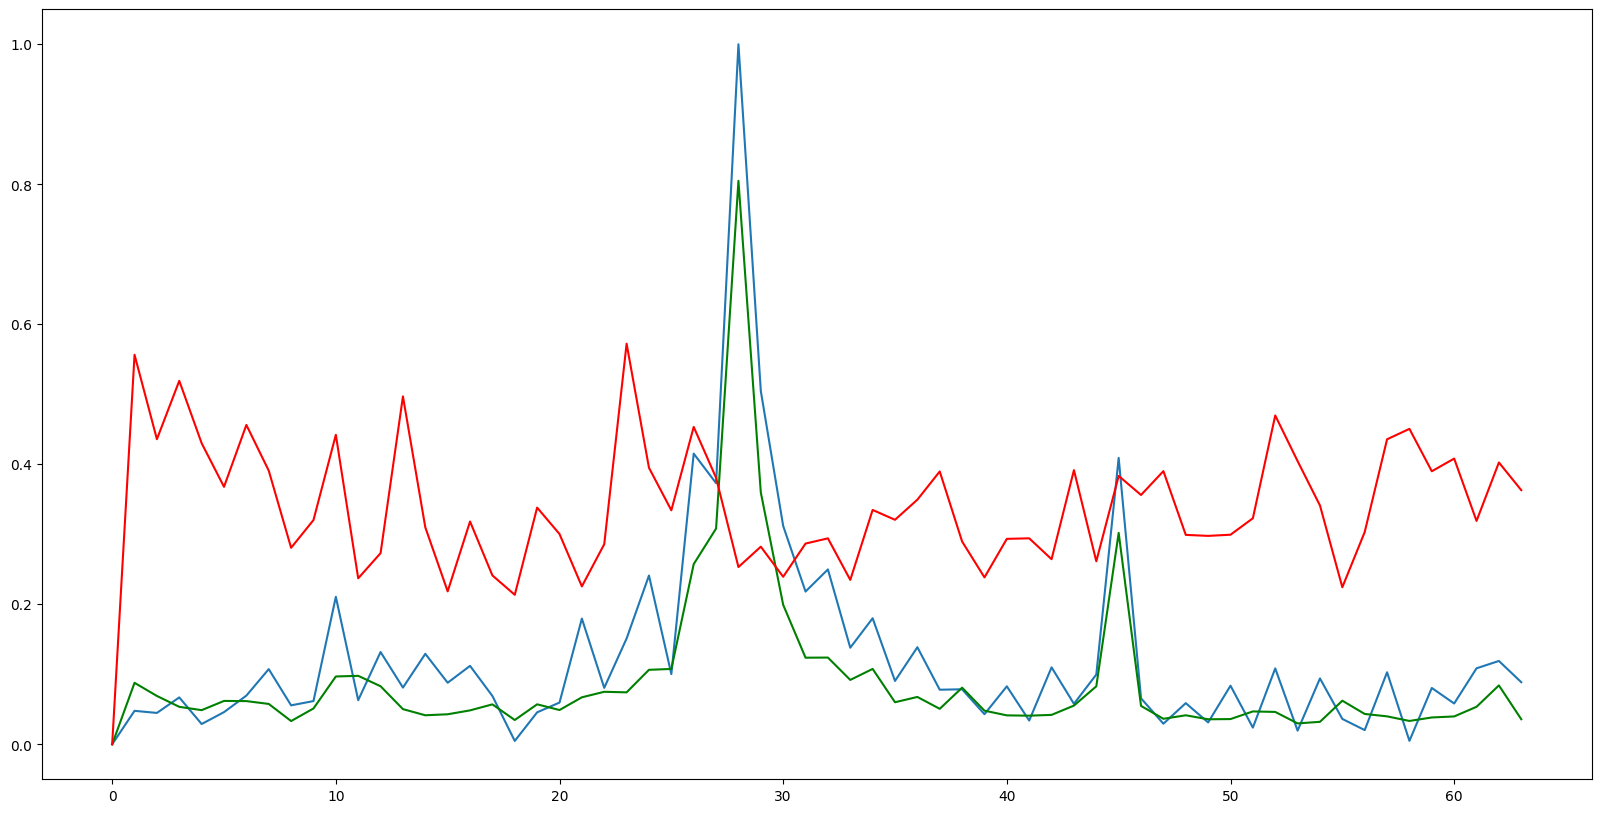

In [18]:
#plot
plt.figure(figsize=(20,10))
plt.plot(sample_test)
#samplesOK_mean
plt.plot(samplesOK_mean, color='green')
#plot bad samples mean
plt.plot(samples_bad_mean, color='red')

plt.show()



(64,)
(64,)
(64,)
2.502662094417704
0.6794949889585694


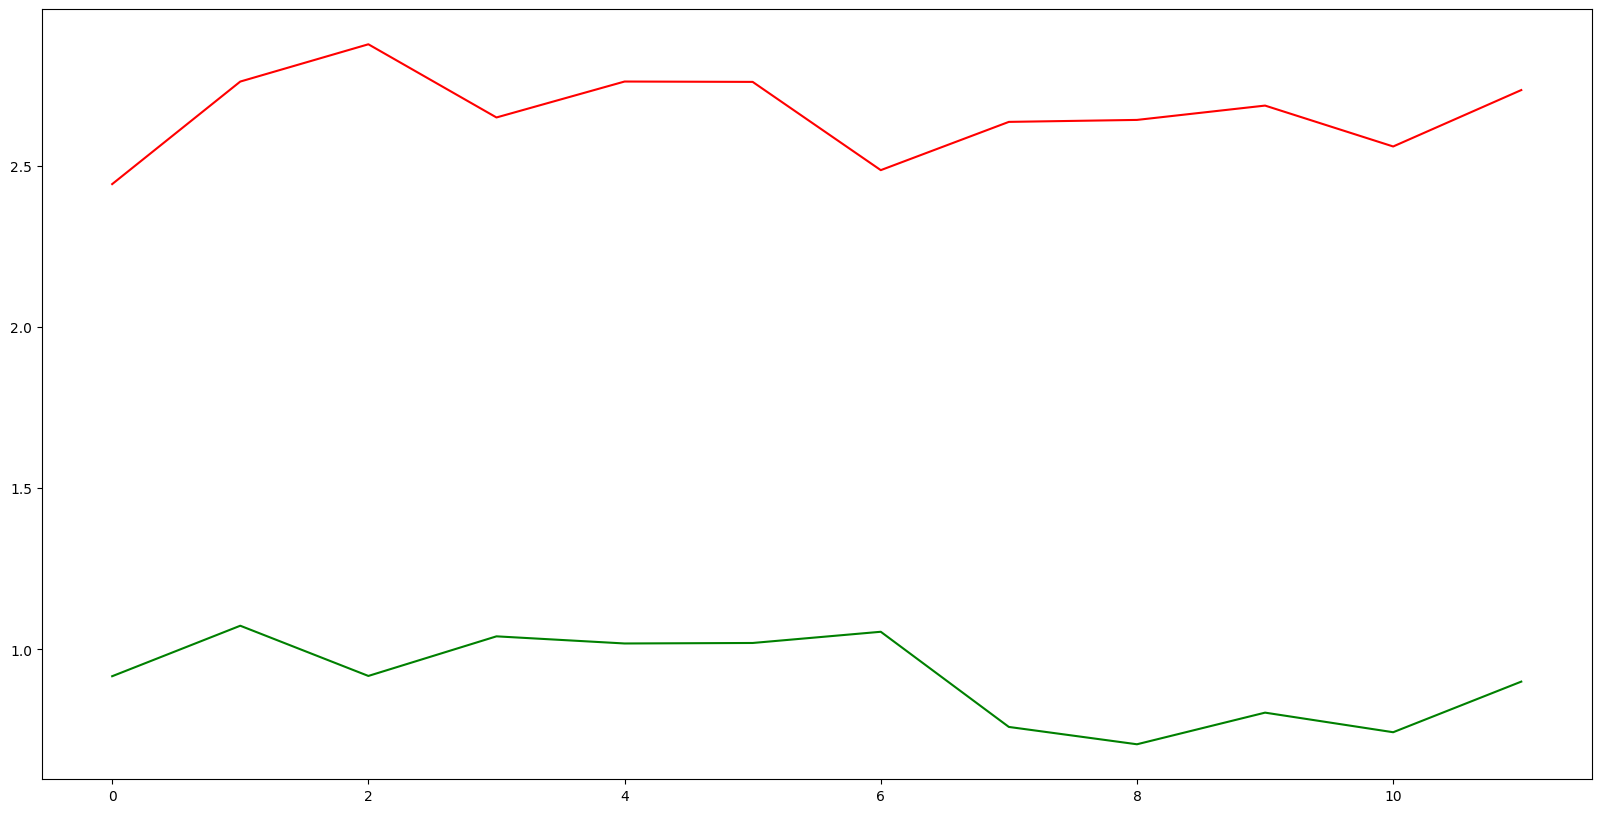

(12, 64)
(12, 64)


In [19]:
print(samples_bad_mean.shape)
print(samplesOK_mean.shape)
print(sample_test.shape)

#helling distance between test sample and good samples
#use the vectorized version of the helling distance

hellinger_distance_test_bad = np.sqrt(np.sum(np.square(np.sqrt(sample_test) - np.sqrt(samples_bad_mean))))
print(hellinger_distance_test_bad)

hellinger_distance_test_good = np.sqrt(np.sum(np.square(np.sqrt(sample_test) - np.sqrt(samplesOK_mean))))
print(hellinger_distance_test_good)

hell_dist_sample_good=[]
for sample in samplesOK:
    hell_dist_sample_good.append(np.sqrt(np.sum(np.square(np.sqrt(sample) - np.sqrt(sample_test)))))

hell_dist_sample_bad=[]
for sample in samples_bad:
    hell_dist_sample_bad.append(np.sqrt(np.sum(np.square(np.sqrt(sample) - np.sqrt(sample_test)))))

plt.figure(figsize=(20,10))
plt.plot(hell_dist_sample_good, color='green')
plt.plot(hell_dist_sample_bad, color='red')
plt.show()


print(samples_bad.shape)
print(samplesOK.shape)






# get 3 samples for calibration

In [20]:
#load test sammple fft_press_3_times.txt

samples_press_3_times=[]
sample_press_3_times=[]
for line in open('fft_press_3_times.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample_press_3_times.append(float(line))
    elif line.strip() == "FFT OUTPUT end":
        samples_press_3_times.append(sample_press_3_times)
        sample_press_3_times=[]

print(samples_press_3_times)
#to numpy array
samples_press_3_times = np.array(samples_press_3_times)
#shape
print(samples_press_3_times.shape)

sample_press_ok = []

#open the file
for line in open('fft_unlock_ok.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip() != "FFT OUTPUT end":
        sample_press_ok.append(float(line))
    elif line.strip() == "FFT OUTPUT end":
        break

print(sample_press_ok)

#avg 3 samples
sample_press_ok_mean = np.mean(samples_press_3_times, axis=0)
print(sample_press_ok)




[[0.0, 1436.37, 1255.97, 1831.04, 732.95, 1785.11, 1811.22, 1811.86, 93.14, 307.43, 4402.44, 1404.17, 4181.42, 1354.83, 2187.97, 1315.51, 3508.01, 3144.57, 2246.62, 1541.23, 1658.81, 2099.66, 3888.07, 4260.69, 6670.36, 1356.92, 12278.76, 11744.56, 27852.5, 15701.24, 9359.37, 7737.85, 8579.56, 2569.65, 6215.41, 3090.93, 2746.74, 527.85, 2253.93, 654.0, 2418.06, 1217.93, 3594.76, 2147.16, 3310.69, 13152.83, 935.3, 1821.09, 2018.91, 1138.89, 2634.61, 1625.61, 2706.72, 492.42, 2227.01, 3485.52, 1191.83, 625.44, 315.72, 1347.02, 2023.7, 2617.73, 2008.48, 2716.96], [0.0, 3153.01, 1448.26, 3198.37, 1549.02, 2581.75, 2929.43, 1399.37, 677.53, 1541.29, 4713.54, 1347.13, 4796.07, 1317.19, 3241.45, 1313.75, 4775.65, 1271.48, 1281.52, 890.81, 2976.09, 779.68, 3050.18, 807.15, 3798.02, 3533.63, 5916.08, 17293.98, 32184.06, 12446.56, 3217.99, 5267.36, 2709.92, 4996.69, 2699.32, 1286.51, 1652.59, 1718.3, 2827.58, 891.32, 2343.77, 504.1, 981.73, 1158.75, 2770.44, 12998.08, 3076.76, 1742.38, 1885.76, 1

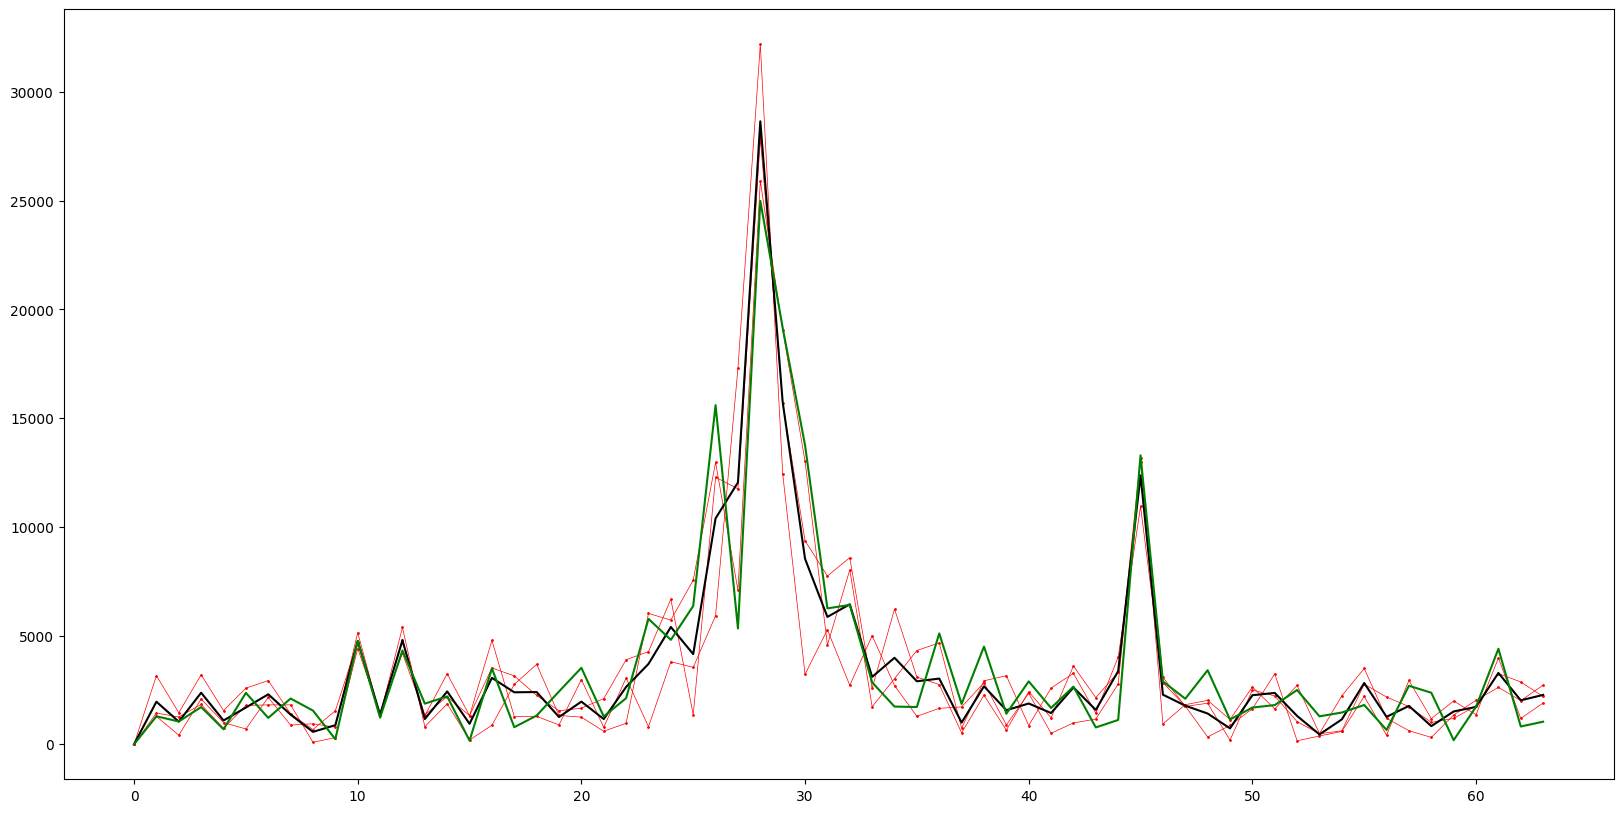

In [21]:
#plot the samples
plt.figure(figsize=(20,10))
for sample in samples_press_3_times:
    plt.plot(sample, color='red', linewidth=0.5, marker='o', markersize=1)

#mean
plt.plot(sample_press_ok_mean, color='black')

plt.plot(sample_press_ok, color='green')
plt.show()


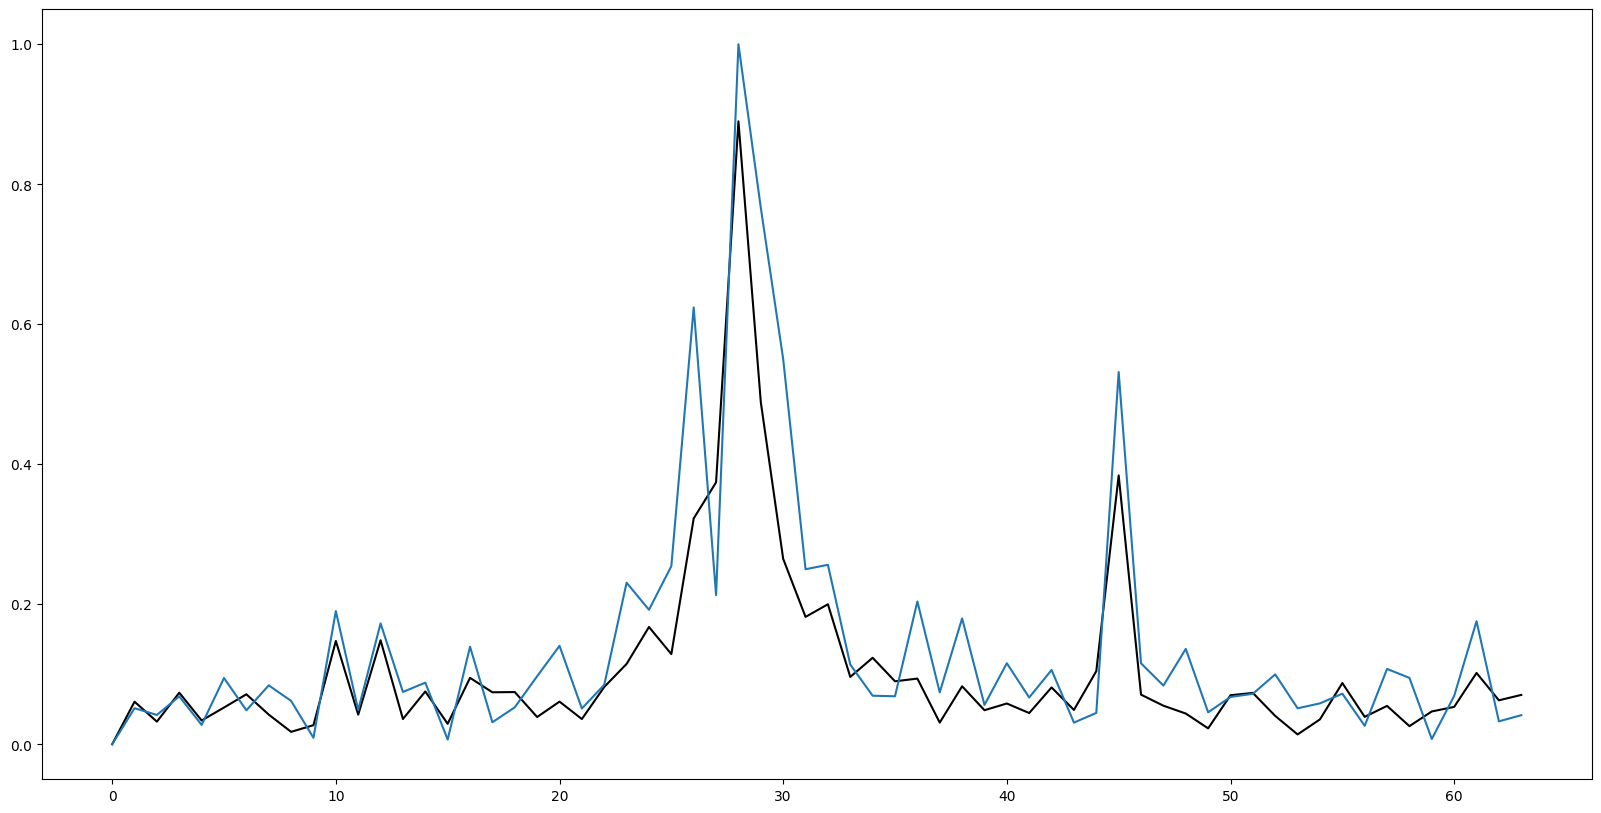

In [22]:
#scale the samples
samples_press_3_times = samples_press_3_times - np.min(samples_press_3_times)
samples_press_3_times = samples_press_3_times / np.max(samples_press_3_times)

sample_press_ok = sample_press_ok - np.min(sample_press_ok)
sample_press_ok = sample_press_ok / np.max(sample_press_ok)

#mean of the samples
samples_press_3_times_mean = np.mean(samples_press_3_times, axis=0)

#plot the samples
plt.figure(figsize=(20,10))

#mean
plt.plot(samples_press_3_times_mean, color='black')

plt.plot(sample_press_ok)

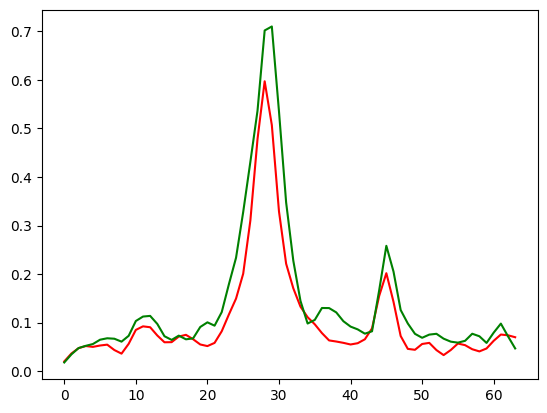

In [23]:
gaussian_filtered_samples_press_3_times = gaussian_filter1d(samples_press_3_times_mean, sigma=1)
plt.plot(gaussian_filtered_samples_press_3_times, color='red')

gausain_filtered_sample_press_ok = gaussian_filter1d(sample_press_ok, sigma=1)
plt.plot(gausain_filtered_sample_press_ok, color='green')



In [24]:
#calculate the hellinger distance between the sample_ok and the samples_press_3_times filtered with gaussian

hellinger_distance_press_3_times = np.sqrt(np.sum(np.square(np.sqrt(gaussian_filtered_samples_press_3_times) - np.sqrt(gausain_filtered_sample_press_ok))))
print(hellinger_distance_press_3_times)

0.495135747367539


2.028743339982652
2.4306721083989347
2.516800430773987
2.2970091078848904
2.4377891906548106
2.4212395572462957
2.244622634886459
2.3389624153435964
2.3457513736154074
2.4030130064840005
2.2401210961378806
2.3862728796564507
[0.42900824429516315, 0.57514404887827, 0.4418351923586103, 0.5467973782122865, 0.3820468878873457, 0.41980735998377394, 0.5376916443430343, 0.370872748217779, 0.2687244718966011, 0.354250559324443, 0.24392812718972962, 0.34443457540041056]
[2.028743339982652, 2.4306721083989347, 2.516800430773987, 2.2970091078848904, 2.4377891906548106, 2.4212395572462957, 2.244622634886459, 2.3389624153435964, 2.3457513736154074, 2.4030130064840005, 2.2401210961378806, 2.3862728796564507]


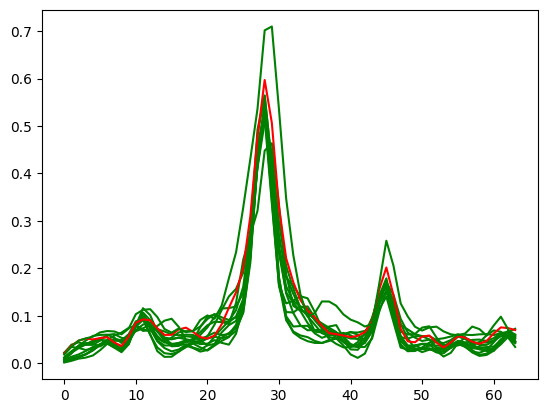

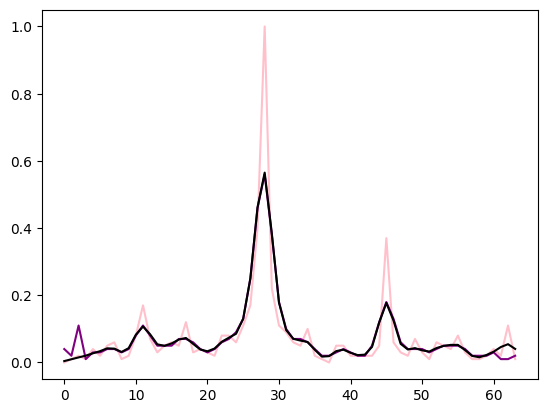

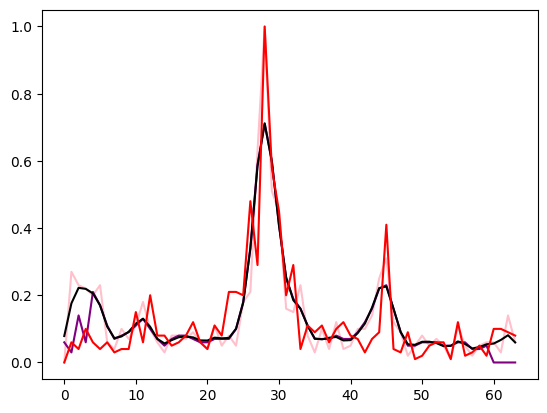

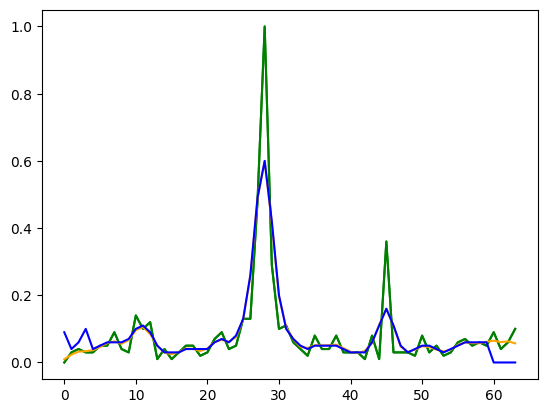

In [25]:
#for every sample n false positive calcuate the hellinger distance
#filter samples_falsepositive
falsepos=samples_falsepositive - np.min(samples_falsepositive)
falsepos=falsepos / np.max(falsepos)

hell_dist_sample_good=[]
hell_dist_sample_bad=[]

one_sample_falsepos = falsepos[0]
for one_sample_falsepos in falsepos:
    gaussian_filtered_one_sample_falsepos = gaussian_filter1d(one_sample_falsepos, sigma=1)

    hellinger_distance_falsepos = np.sqrt(np.sum(np.square(np.sqrt(gaussian_filtered_one_sample_falsepos) - np.sqrt(gausain_filtered_sample_press_ok))))
    print(hellinger_distance_falsepos)
    hell_dist_sample_bad.append(hellinger_distance_falsepos)
    #plt.plot(gaussian_filtered_one_sample_falsepos, color='blue')


for sample in samplesOK:
    gaussian_filtered_sample = gaussian_filter1d(sample, sigma=1)
    plt.plot(gaussian_filtered_sample, color='green')
    hell_dist_sample_good.append(np.sqrt(np.sum(np.square(np.sqrt(gaussian_filtered_sample) - np.sqrt(gaussian_filtered_samples_press_3_times)))))
    



#plot the samples
plt.plot(gaussian_filtered_samples_press_3_times, color='red')
plt.plot(gausain_filtered_sample_press_ok, color='green')

print(hell_dist_sample_good)
print(hell_dist_sample_bad)


# h=[0.00, 0.03, 0.03, 0.03, 0.06, 0.03, 0.06, 0.07, 0.05, 0.06, 0.13, 0.13, 0.03, 0.03, 0.02, 0.02, 0.01, 0.05, 0.05, 0.04, 0.05, 0.08, 0.05, 0.08, 0.06, 0.12, 0.17, 0.41, 1.00, 0.22, 0.12, 0.10, 0.05, 0.06, 0.07, 0.05, 0.05, 0.05, 0.09, 0.02, 0.01, 0.03, 0.01, 0.04, 0.06, 0.35, 0.03, 0.03, 0.00, 0.06, 0.01, 0.01, 0.05, 0.03, 0.04, 0.07, 0.04, 0.03, 0.02, 0.04, 0.01, 0.01, 0.14, 0.00]
# plt.plot(h, color='yellow')
# k=[0.00, 0.00, 0.01, 0.00, 0.03, 0.03, 0.06, 0.05, 0.03, 0.04, 0.09, 0.15, 0.04, 0.02, 0.01, 0.01, 0.00, 0.08, 0.02, 0.02, 0.02, 0.04, 0.05, 0.06, 0.07, 0.09, 0.14, 0.35, 1.00, 0.22, 0.12, 0.10, 0.08, 0.07, 0.12, 0.04, 0.05, 0.06, 0.10, 0.03, 0.03, 0.03, 0.04, 0.06, 0.10, 0.31, 0.03, 0.01, 0.00, 0.05, 0.02, 0.06, 0.01, 0.01, 0.02, 0.07, 0.05, 0.02, 0.00, 0.00, 0.00, 0.00, 0.01, 0.02]
# plt.plot(k, color='orange')
# l=[0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.03, 0.01, 0.05, 0.06, 0.04, 0.05, 0.04, 0.05, 0.07, 0.21, 0.03, 0.04, 0.08, 0.07, 0.06, 0.12, 0.06, 0.09, 0.07, 0.09, 0.03, 0.08, 0.05, 0.10, 0.38, 0.81, 1.04, 0.40, 0.32, 0.20, 0.12, 0.16, 0.19, 0.12, 0.04, 0.09, 0.15, 0.07, 0.08, 0.08, 0.04, 0.10, 0.26, 0.26, 0.16, 0.12, 0.03, 0.02, 0.07, 0.04, 0.05, 0.01, 0.08, 0.14, 0.06, 0.04, 0.06, 0.07]
# plt.plot(l, color='purple')
# p=[0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.01, 0.05, 0.04, 0.07, 0.05, 0.01, 0.02, 0.09, 0.18, 0.05, 0.05, 0.04, 0.04, 0.05, 0.05, 0.06, 0.05, 0.05, 0.06, 0.08, 0.10, 0.09, 0.15, 0.24, 0.52, 1.02, 0.22, 0.13, 0.13, 0.14, 0.14, 0.18, 0.11, 0.10, 0.07, 0.04, 0.08, 0.03, 0.03, 0.05, 0.10, 0.16, 0.30, 0.01, 0.03, 0.04, 0.02, 0.05, 0.08, 0.02, 0.03, 0.03, 0.08, 0.04, 0.01, 0.01, 0.02]
# plt.plot(p, color='pink')
# o=[0.00, 0.08, 0.27, 0.29, 0.17, 0.22, 0.41, 0.25, 0.11, 0.10, 0.27, 0.15, 0.13, 0.20, 0.15, 0.09, 0.09, 0.06, 0.09, 0.08, 0.12, 0.12, 0.06, 0.11, 0.11, 0.08, 0.17, 0.73, 1.00, 0.19, 0.23, 0.06, 0.11, 0.13, 0.14, 0.09, 0.05, 0.08, 0.06, 0.06, 0.17, 0.17, 0.11, 0.19, 0.25, 0.34, 0.17, 0.16, 0.16, 0.20, 0.15, 0.07, 0.16, 0.08, 0.04, 0.07, 0.12, 0.06, 0.07, 0.06, 0.02, 0.10, 0.19, 0.15]
# plt.plot(o, color='silver')

#apply the gaussian filter to the samples
# o_gauss= gaussian_filter1d(o, sigma=1)
# plt.plot(o_gauss, color='black')
plt.show()
bef=[0.00, 0.01, 0.02, 0.01, 0.04, 0.02, 0.05, 0.06, 0.01, 0.02, 0.08, 0.17, 0.07, 0.03, 0.05, 0.06, 0.05, 0.12, 0.03, 0.04, 0.03, 0.02, 0.08, 0.08, 0.06, 0.11, 0.17, 0.40, 1.00, 0.22, 0.11, 0.09, 0.06, 0.05, 0.10, 0.02, 0.01, 0.00, 0.05, 0.05, 0.02, 0.02, 0.02, 0.02, 0.05, 0.37, 0.06, 0.03, 0.02, 0.07, 0.03, 0.01, 0.06, 0.05, 0.04, 0.08, 0.03, 0.01, 0.01, 0.02, 0.04, 0.02, 0.11, 0.01]

aft=[0.03, 0.01, 0.01, 0.02, 0.04, 0.02, 0.11, 0.01, 0.03, 0.03, 0.04, 0.04, 0.03, 0.04, 0.08, 0.11, 0.08, 0.05, 0.05, 0.05, 0.07, 0.07, 0.06, 0.04, 0.03, 0.04, 0.06, 0.07, 0.09, 0.13, 0.25, 0.46, 0.56, 0.38, 0.18, 0.10, 0.07, 0.07, 0.06, 0.04, 0.02, 0.02, 0.03, 0.04, 0.03, 0.02, 0.02, 0.05, 0.12, 0.18, 0.13, 0.06, 0.04, 0.04, 0.04, 0.03, 0.04, 0.05, 0.05, 0.05, 0.04, 0.02, 0.02, 0.02]
plt.plot(bef, color='pink')


#shift the samples to the left by 9
aft = np.roll(aft, -4)
plt.plot(aft, color='purple')

aft_py = gaussian_filter1d(bef, sigma=1)
plt.plot(aft_py, color='black')

plt.show()
bef2=[0.00, 0.27, 0.23, 0.22, 0.20, 0.23, 0.06, 0.04, 0.10, 0.07, 0.11, 0.18, 0.10, 0.06, 0.03, 0.08, 0.08, 0.07, 0.09, 0.06, 0.04, 0.11, 0.05, 0.08, 0.05, 0.18, 0.21, 0.63, 1.00, 0.51, 0.45, 0.16, 0.15, 0.23, 0.08, 0.03, 0.10, 0.04, 0.12, 0.04, 0.05, 0.10, 0.10, 0.14, 0.25, 0.31, 0.12, 0.09, 0.02, 0.05, 0.08, 0.05, 0.07, 0.05, 0.01, 0.11, 0.05, 0.02, 0.05, 0.06, 0.06, 0.03, 0.14, 0.06]
af2=[0.06, 0.03, 0.14, 0.06, 0.21, 0.17, 0.11, 0.07, 0.08, 0.09, 0.11, 0.13, 0.10, 0.07, 0.05, 0.07, 0.08, 0.08, 0.07, 0.06, 0.06, 0.07, 0.07, 0.07, 0.10, 0.18, 0.34, 0.59, 0.71, 0.60, 0.41, 0.25, 0.19, 0.16, 0.11, 0.07, 0.07, 0.07, 0.08, 0.07, 0.07, 0.09, 0.12, 0.16, 0.22, 0.23, 0.16, 0.09, 0.05, 0.05, 0.06, 0.06, 0.06, 0.05, 0.05, 0.06, 0.06, 0.04, 0.04, 0.05, 0.00, 0.00, 0.00, 0.00]

af_py = gaussian_filter1d(bef2, sigma=1, mode='constant', cval=0.0)

plt.plot(bef2, color='pink')
plt.plot(af2, color='purple')
plt.plot(af_py, color='black')

h=[0.00, 0.06, 0.04, 0.10, 0.06, 0.04, 0.06, 0.03, 0.04, 0.04, 0.15, 0.06, 0.20, 0.08, 0.08, 0.05, 0.06, 0.08, 0.12, 0.06, 0.04, 0.11, 0.08, 0.21, 0.21, 0.20, 0.48, 0.29, 1.00, 0.58, 0.45, 0.20, 0.29, 0.04, 0.11, 0.09, 0.11, 0.06, 0.10, 0.12, 0.08, 0.07, 0.03, 0.07, 0.09, 0.41, 0.04, 0.03, 0.09, 0.01, 0.02, 0.05, 0.06, 0.06, 0.01, 0.12, 0.02, 0.03, 0.05, 0.02, 0.10, 0.10, 0.09, 0.08]
plt.plot(h, color='red')


#load raw.txt
kk=[]
with open('raw.txt') as f:
    for line in f:
        kk.append(float(line))
plt.show()


og=kk[:64]
plt.plot(og, color='green')

gaussed=gaussian_filter1d(kk[:64].copy(), sigma=1, mode='constant', cval=0.0)


#og
plt.plot(og, color='green')
plt.plot(gaussed, color='orange')
plt.plot(kk[64:], color='blue')




(102, 64)
(64,)


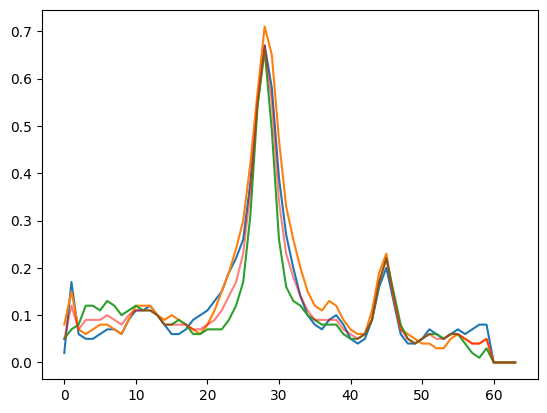

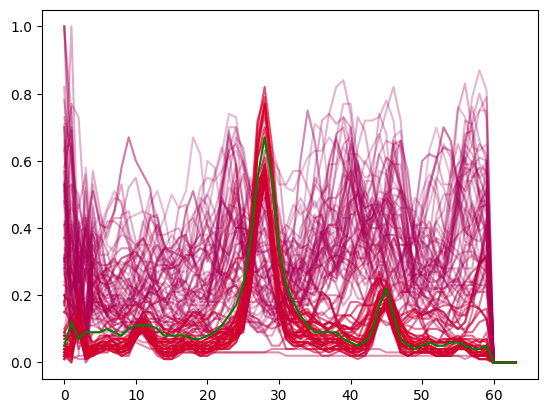

[492.1875, 492.1875, 492.1875, 492.1875]
[28, 28, 28, 28]


In [26]:
calib=[]

with open('raw_calib.txt') as f:
    for line in f:
        calib.append(float(line))

for i in range(0, 3):
    
    plt.plot(calib[i*64:(i+1)*64])

plt.plot(calib[192:256], color='red', alpha=0.5)

ref = calib[192:256]
#to numpy array
ref = np.array(ref)



hells=[]

samples_falsepositive2=[]
sample_falsepositive2=[]
for line in open('false_pos2.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip()[0:14] != "FFT OUTPUT end":
        sample_falsepositive2.append(float(line))
    elif line.strip()[0:14]  == "FFT OUTPUT end":
        hells.append(float(line.split(" ")[-1]) )
        samples_falsepositive2.append(sample_falsepositive2)
        sample_falsepositive2=[]


#samples_falsepositive2.append(calib[0:64])


#to numpy array
samples_falsepositive2 = np.array(samples_falsepositive2)

print(samples_falsepositive2.shape)
print(ref.shape)


plt.show()

  

#calculate hellinger distance for each sample

hellinger_distances=[]


for i in range(0, samples_falsepositive2.shape[0]):
    hellinger_distance_falsepos_og = np.sqrt(np.sum(np.square(np.sqrt(ref) - np.sqrt(samples_falsepositive2[i]))))


    
    #create  list of colors from dark blue to red 

    colors=[]
    import matplotlib.colors as colors

    cdict = {'red':   [(0.0,  1.0, 1.0),
                   (1.0,  0.5, 0.5)],
         'green': [(0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)],
         'blue':  [(0.0,  0.0, 0.0),
                   (1.0,  0.5, 0.5)]}
    custom_map = colors.LinearSegmentedColormap('custom_map', cdict)


    c_normalized= hellinger_distance_falsepos_og / 5.0

    #take the square root to make the color gradient more linear
    c_normalized = np.sqrt(c_normalized)

    #make sure the color is between 0 and 1



    if c_normalized > 1.0:
        c_normalized = 1.0

    #has to be between 0 and 1 to return a color value
    color_tuple = custom_map(c_normalized)

    plt.plot(samples_falsepositive2[i], color=color_tuple, alpha=1.0-c_normalized)

    


    







    hellinger_distances.append((hells[i],hellinger_distance_falsepos_og))




for i in range(0, 4):
    
    xx=calib[i*64:(i+1)*64]

    hellinger_distance_falsepos_og = np.sqrt(np.sum(np.square(np.sqrt(ref) - np.sqrt(xx))))

    hellinger_distance_falsepos = (ref * xx)

    hellinger_distance_falseposf = np.sqrt(hellinger_distance_falsepos)

    hellinger_distance_falsepos = np.sum(hellinger_distance_falseposf)

    hellinger_distances.append((0.0,hellinger_distance_falsepos_og))


for h in hellinger_distances:
    #print('{:.2f} {:.2f}'.format(h[0], h[1]))
    pass

plt.plot(ref, color='green')

plt.show()


#        float32_t frequency_of_max_bin = (float32_t)max_val_index * (float32_t)frequency * 1000.0 / (float32_t)FFT_TEST_OUT_SAMPLES_LEN;


freqencyofmaxbin=[]
indexofmaxbin=[]
frq=2.25 #from chip

for i in range(0, 4):
    
    xx=calib[i*64:(i+1)*64]

    #get max bin
    max_val_index = np.argmax(xx)
    indexofmaxbin.append(max_val_index)
    freqencyofmaxbin.append(max_val_index * frq * 1000.0 / 128.0)


print(freqencyofmaxbin)
print(indexofmaxbin)




    
    

[492.1875, 492.1875, 492.1875, 492.1875]
[28, 28, 28, 28]
0.0
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 

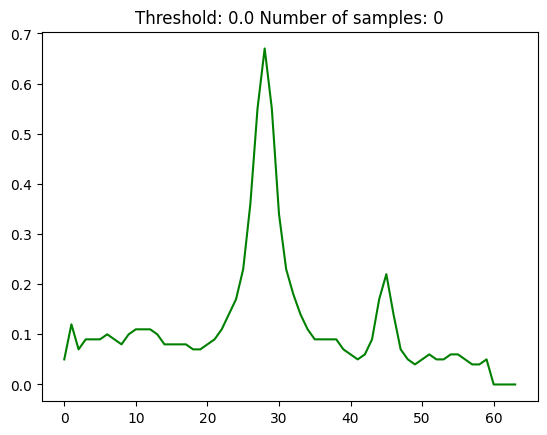

0.1
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578

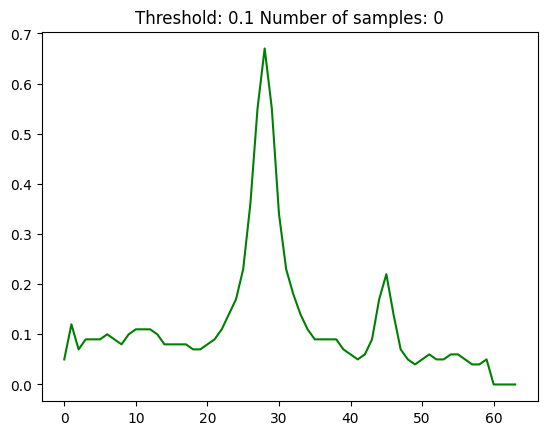

0.2
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578

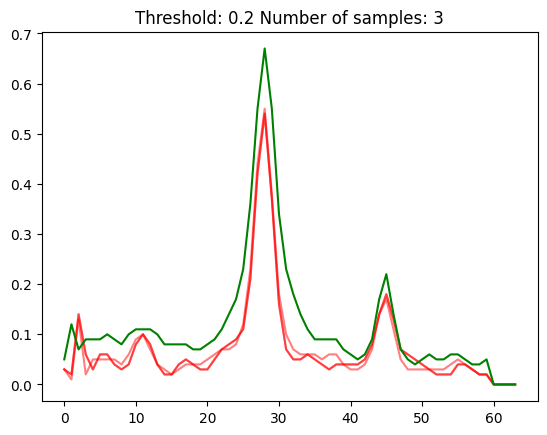

0.30000000000000004
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625,

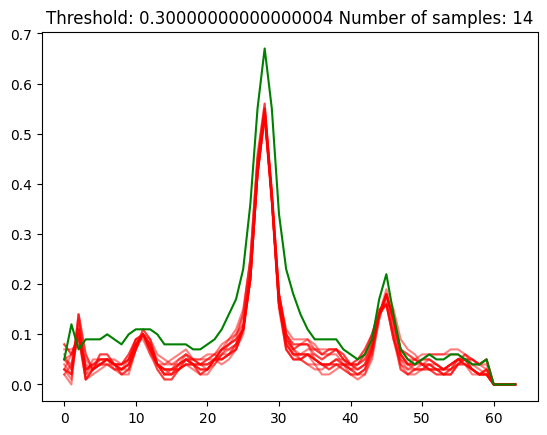

0.4
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578

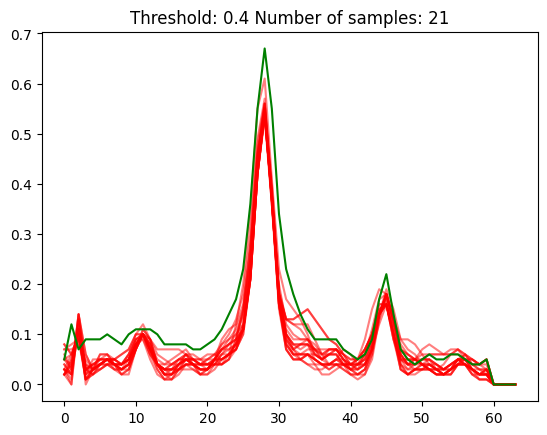

0.5
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578

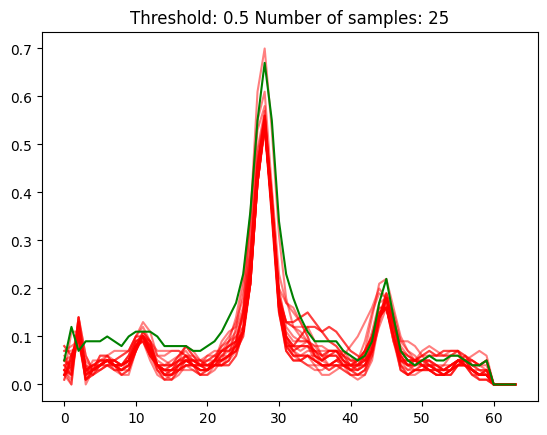

0.6000000000000001
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 

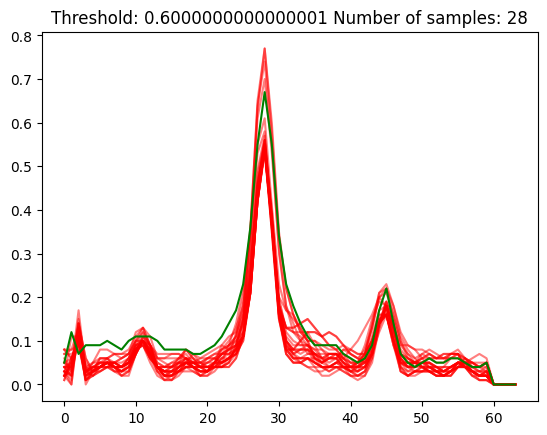

0.7000000000000001
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 

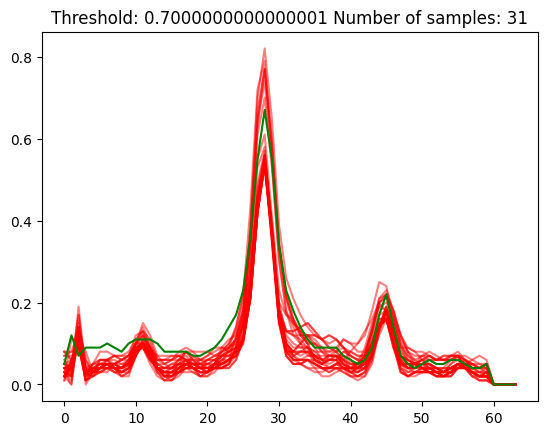

0.8
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578

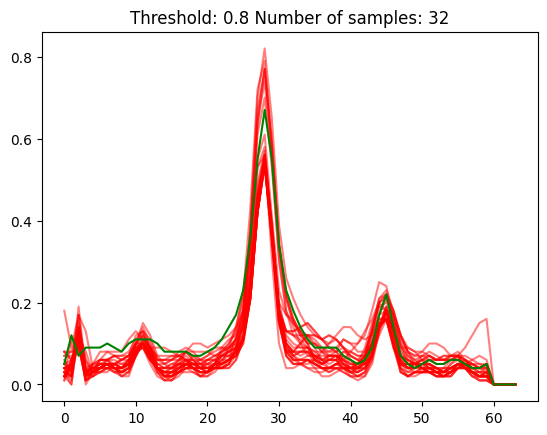

0.9
[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578

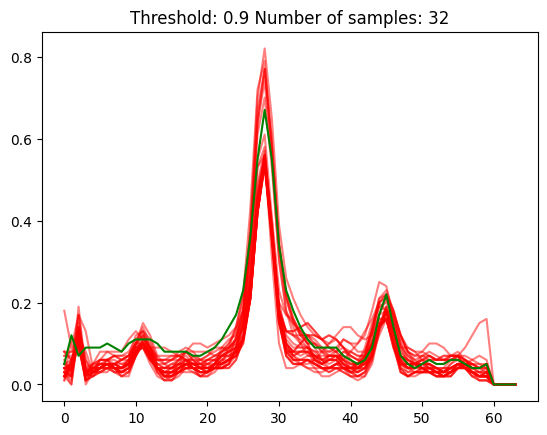

In [27]:
#plot only the ones with e





for i in range(0, 4):
    
    xx=calib[i*64:(i+1)*64]

    #get max bin
   

print(freqencyofmaxbin)
print(indexofmaxbin)


for thresh in np.arange(0.0, 1.0, 0.1):
    num_ofsamples=0

    freqencyofmaxbin=[]
    indexofmaxbin=[]
    frq=2.25 #from chip
    values=[]

    threshold=thresh
    print(threshold)
    for i in range(0, samples_falsepositive2.shape[0]):
        hellinger_distance_falsepos_og = hells[i]

        max_val_index = np.argmax(samples_falsepositive2[i])
        indexofmaxbin.append(max_val_index)
        freqencyofmaxbin.append(max_val_index * frq * 1000.0 / 128.0)
        values.append(samples_falsepositive2[i][max_val_index])


        if hellinger_distance_falsepos_og < threshold:
            plt.plot(samples_falsepositive2[i], color='red', alpha=0.5)
            num_ofsamples+=1

    plt.plot(ref, color='green')
    #set title
    plt.title('Threshold: ' + str(threshold) + ' Number of samples: ' + str(num_ofsamples))

    print(freqencyofmaxbin)
    print(indexofmaxbin)
    print(values)
    


    plt.show()




[0.0, 492.1875, 492.1875, 1019.53125, 70.3125, 773.4375, 703.125, 685.546875, 667.96875, 404.296875, 685.546875, 667.96875, 826.171875, 755.859375, 685.546875, 492.1875, 492.1875, 492.1875, 492.1875, 720.703125, 492.1875, 492.1875, 808.59375, 316.40625, 650.390625, 1019.53125, 0.0, 826.171875, 703.125, 791.015625, 685.546875, 773.4375, 474.609375, 70.3125, 808.59375, 17.578125, 0.0, 1001.953125, 0.0, 808.59375, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 492.1875, 597.65625, 492.1875, 492.1875, 492.1875, 492.1875, 158.203125, 1019.53125, 0.0, 404.296875, 123.046875, 808.59375, 984.375, 703.125, 984.375, 0.0, 421.875, 492.1875, 492.1875, 421.875, 439.453125, 492.1875, 492.1875, 984.375, 404.296875, 773.4375, 492.1875, 492.1875, 1037.109375, 0.0, 0.0, 966.796875, 0.0, 808.59375, 421.875, 492.1875, 492.1875, 492.1875, 492.1875, 1019.53125, 492.1875, 492.1875, 931.640625, 703.125, 931.640625, 703.125, 17.578125,

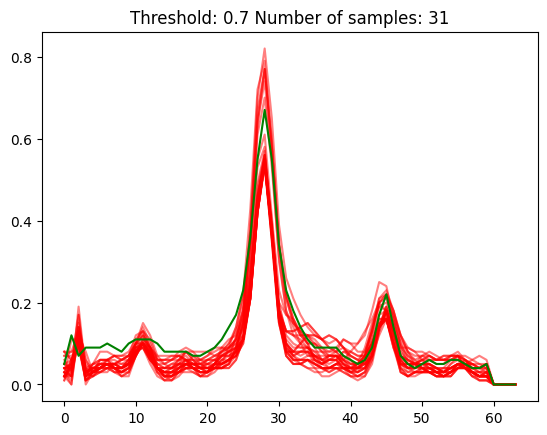

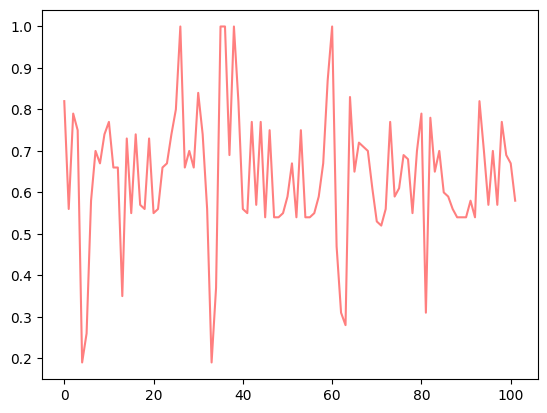

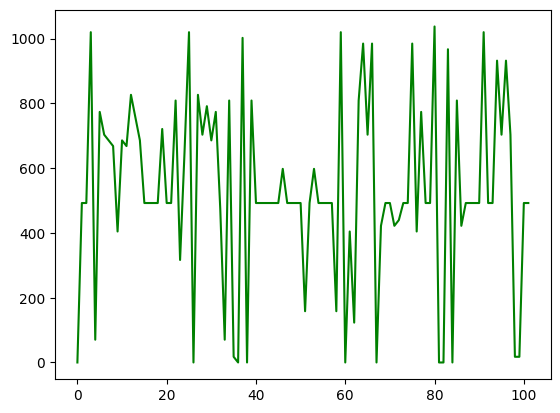

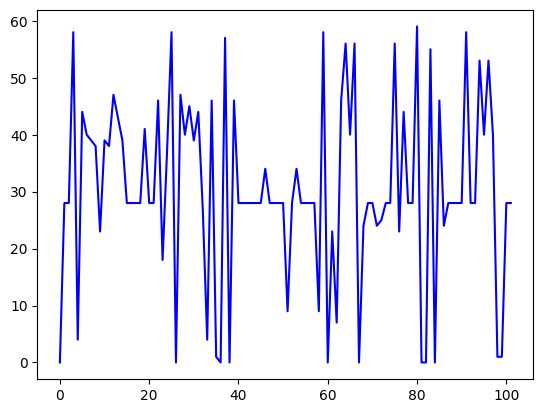

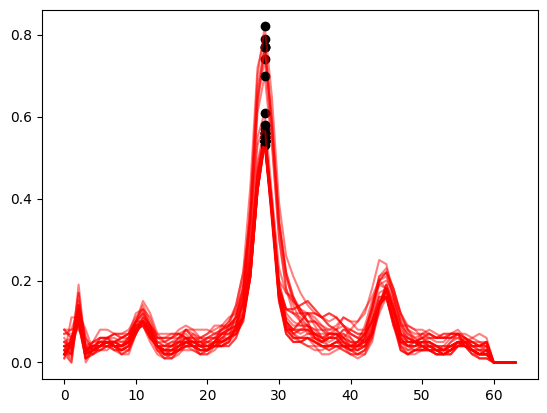

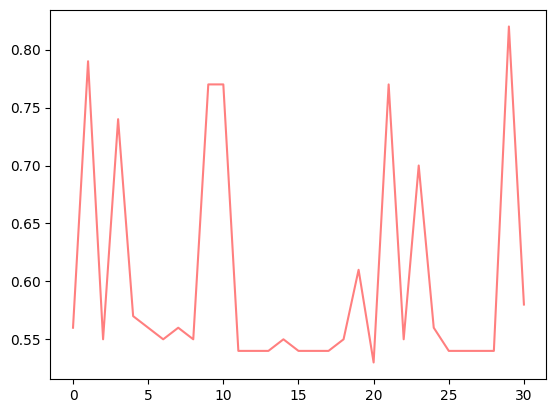

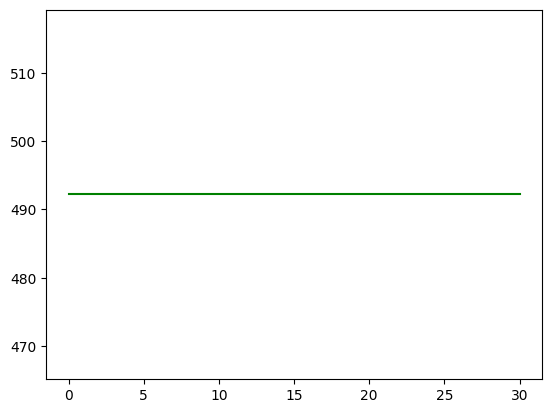

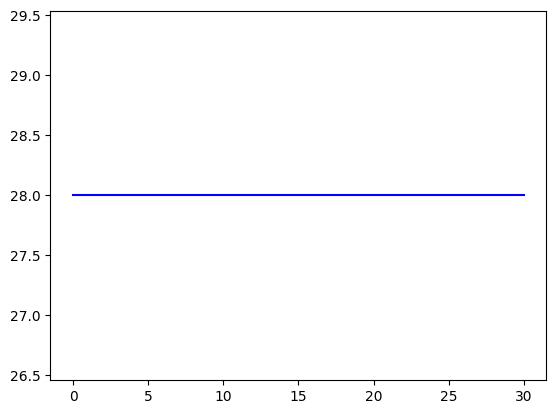

In [28]:
#plot only the ones with e





for i in range(0, 4):
    
    xx=calib[i*64:(i+1)*64]

    #get max bin
   

print(freqencyofmaxbin)
print(indexofmaxbin)


for thresh in [0.7]:
    num_ofsamples=0

    freqencyofmaxbin=[]
    indexofmaxbin=[]
    frq=2.25 #from chip
    values=[]

    threshold=thresh
    print(threshold)
    for i in range(0, samples_falsepositive2.shape[0]):
        hellinger_distance_falsepos_og = hells[i]

        max_val_index = np.argmax(samples_falsepositive2[i])
        indexofmaxbin.append(max_val_index)
                #float32_t frequency_of_max_bin = (float32_t)max_val_index * (float32_t)frequency * 1000.0 / (float32_t)FFT_TEST_OUT_SAMPLES_LEN;

        freqencyofmaxbin.append(max_val_index * frq * 1000.0 / 128.0)
        values.append(samples_falsepositive2[i][max_val_index])


        if hellinger_distance_falsepos_og < threshold:
            plt.plot(samples_falsepositive2[i], color='red', alpha=0.5)
            num_ofsamples+=1

    plt.plot(ref, color='green')
    #set title
    plt.title('Threshold: ' + str(threshold) + ' Number of samples: ' + str(num_ofsamples))

    plt.show()

    plt.plot(values, color='red', alpha=0.5)
    plt.show()
    plt.plot(freqencyofmaxbin, color='green')
    plt.show()

    plt.plot(indexofmaxbin, color='blue')
    plt.show()

    

for i in range(0, samples_falsepositive2.shape[0]):

    if hells[i] < 0.7 and (indexofmaxbin[i] <=28 or indexofmaxbin[i] >= 32):
        plt.plot(samples_falsepositive2[i], color='red', alpha=0.5)
        #mark the max bin
        plt.plot(indexofmaxbin[i], values[i], 'o', color='black')
        num_ofsamples+=1

plt.show()

vals=[]
freqs=[]
indzs=[]


for i in range(0, samples_falsepositive2.shape[0]):

    if hells[i] < 0.7:
        vals.append(values[i])
        freqs.append(freqencyofmaxbin[i])

        indzs.append(indexofmaxbin[i])


plt.plot(vals, color='red', alpha=0.5)
plt.show()
plt.plot(freqs, color='green')
plt.show()

plt.plot(indzs, color='blue')
plt.show()








(36, 64)


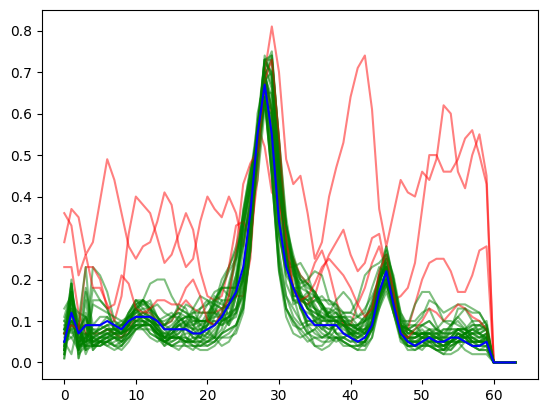

In [29]:
#load working samples that pass the max bin index filter
hells_passed=[]

samples_passes=[]
sample_passes=[]
for line in open('working.txt'):
    if line.strip() != "FFT OUTPUT start" and line.strip()[0:14] != "FFT OUTPUT end":
        sample_passes.append(float(line))
    elif line.strip()[0:14]  == "FFT OUTPUT end":
        hells_passed.append(float(line.split(" ")[-1]) )
        samples_passes.append(sample_passes)
        sample_passes=[]

samples_passes=np.array(samples_passes)

print(samples_passes.shape)

for i in range(0, samples_passes.shape[0]):
    if hells_passed[i] < 0.7:
        plt.plot(samples_passes[i], color='green', alpha=0.5)
    else :
        plt.plot(samples_passes[i], color='red', alpha=0.5)


#plot ref
plt.plot(ref, color='blue')
plt.show()

